# Predicting COVID-19 Mortality Rate with Nutrition: A Data Analysis Project Part
## Project Overview

- **Version 0.1 CovidAI**
-**Supervisor**: Dr.Alma Rahat
-**Student**   :Abdullah Sharaf

-This project aims to develop a data Analysis prject and robust   regression model to predict the COVID-19 mortality rate using machine learning techniques.

## Features Summary

- **Country**: The name of the country.
beverages.
- **Animal Products**: Consumption of animal products.
- **Animal fats**: Consumption of animal fats.
- **Cereals - Excluding Beer**: Consumption of cereals, excluding beer.
- **Eggs**: Consumption of eggs.
- **Fish, Seafood**: Consumption of fish and seafood.
- **Fruits - Excluding Wine**: Consumption of fruits, excluding wine.
- **Meat**: Consumption of meat.
- **Milk - Excluding Butter**: Consumption of milk, excluding butter.
- **Miscellaneous**: Consumption of miscellaneous food items.
- **Offals**: Consumption of offals.
- **Oilcrops**: Consumption of oil crops.
- **Pulses**: Consumption of pulses
- **Spices**: Consumption of spices.
- **Starchy Roots**: Consumption of starchy roots.
- **Stimulants**: Consumption of stimulants.
- **Sugar & Sweeteners**: Consumption of sugar and sweeteners.
- **Treenuts**: Consumption of tree nuts.
- **Vegetal Products**: Consumption of vegetal products.
- **Vegetable Oils**: Consumption of vegetable oils.
- **Death rate**: Accumulated death number as a percentage of the population.


**Regression Models we will apply**

## 1. Data Exploration and Preprocessing

In [ ]:
pip install yellowbrick


#### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, PowerTransformer, PolynomialFeatures)
from sklearn.impute import SimpleImputer
import warnings
import io
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.regressor import ResidualsPlot
from sklearn.decomposition import PCA
import plotly.express as px


#### Load and Explore Dataset

In [ ]:
# Upload the file
uploaded = files.upload()
# Assuming the file you uploaded is 'Covid_Death.csv'
filename = list(uploaded.keys())[0]
# Read the uploaded file into a pandas DataFrame
df_raw = pd.read_csv(io.BytesIO(uploaded[filename]))
# Display the first few rows of the DataFrame
df_raw.head(5)

Saving Death_Nutrition_.csv to Death_Nutrition_.csv


Country  Animal fats  Animal Products  \
0          Afghanistan       0.1973           9.4341   
1              Albania       0.1357          18.7684   
2              Algeria       0.0282           9.6334   
3               Angola       0.0560           4.9278   
4  Antigua and Barbuda       0.0087          16.6613   

   Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine  \
0                   24.8097  0.2099         0.0350                   5.3495   
1                    5.7817  0.5815         0.2126                   6.7861   
2                   13.6816  0.5277         0.2416                   6.3801   
3                    9.1085  0.0587         1.7707                   6.0005   
4                    5.9960  0.2274         4.1489                  10.7451   

     Meat  Milk - Excluding Butter  Miscellaneous  ...  Oilcrops  Pulses  \
0  1.2020                   7.5828         0.0728  ...    0.0700  0.2953   
1  1.8845                  15.7213         0.1123  ...    0.9377  0.2380   
2  1.1305                   7.6189         0.1671  ...    0.3493  0.4783   
3  2.0571                   0.8311         0.1165  ...    0.4186  0.6507   
4  5.6888                   6.3663         0.7139  ...    0.2172  0.1840   

   Spices  Starchy Roots  Stimulants  Sugar & Sweeteners  Treenuts  \
0  0.0574         0.8802      0.3078              1.3489    0.0770   
1  0.0008         1.8096      0.1055              1.5367    0.1515   
2  0.0557         4.1340      0.2216              1.8342    0.1152   
3  0.0009        18.1102      0.0508              1.8495    0.0061   
4  0.1524         1.4522      0.1564              3.8749    0.0253   

   Vegetable Oils  Vegetal Products  Death rate  
0          0.5345           40.5645    0.006186  
1          0.3261           31.2304    0.050951  
2          1.0310           40.3651    0.006558  
3          0.6463           45.0722    0.001461  
4          0.8102           33.3233    0.007143  

[5 rows x 21 columns]

In [ ]:
df_raw.keys()

Index(['Country', 'Animal fats', 'Animal Products', 'Cereals - Excluding Beer',
       'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetable Oils', 'Vegetal Products', 'Death rate'],
      dtype='object')

In [ ]:
df_raw.shape

(170, 21)

In [ ]:
df_raw.dtypes.value_counts()

float64    20
object      1
Name: count, dtype: int64

In [ ]:
df_raw.tail()

Country  Animal fats  Animal Products  \
165  Venezuela (Bolivarian Republic of)       0.0403          14.7565   
166                             Vietnam       0.1640           8.5765   
167                               Yemen       0.0446           5.7874   
168                              Zambia       0.0829           6.0197   
169                            Zimbabwe       0.0755           8.1489   

     Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine  \
165                   12.9253  0.3389         0.9456                   7.6460   
166                   16.8740  0.3077         2.6392                   5.9029   
167                   27.2077  0.2579         0.5240                   5.1344   
168                   21.1938  0.3399         1.6924                   1.0183   
169                   22.6240  0.2678         0.5518                   2.2000   

       Meat  Milk - Excluding Butter  Miscellaneous  ...  Oilcrops  Pulses  \
165  3.8328                   9.3920         0.0702  ...    0.0281  0.3342   
166  4.4382                   0.6069         0.0126  ...    0.8410  0.2032   
167  2.7871                   1.8911         0.2033  ...    0.0893  0.8645   
168  1.8427                   1.7570         0.2149  ...    1.8736  0.1756   
169  2.6142                   4.4310         0.2012  ...    0.4498  0.4261   

     Spices  Starchy Roots  Stimulants  Sugar & Sweeteners  Treenuts  \
165  0.0009         2.5643      0.1479              3.4106    0.0009   
166  0.2074         1.0596      0.2880              1.2846    0.3070   
167  0.0347         1.0794      0.2199              5.0468    0.0017   
168  0.0478         7.9649      0.0618              1.5632    0.0014   
169  0.0252         2.9870      0.1494              4.6485    0.0518   

     Vegetable Oils  Vegetal Products  Death rate  
165          1.3734           35.2416    0.004287  
166          0.2201           41.4232    0.000036  
167          1.0811           44.2126    0.002062  
168          0.6657           43.9789    0.004564  
169          1.7103           41.8526    0.008854  

[5 rows x 21 columns]

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   170 non-null    object 
 1   Animal fats               170 non-null    float64
 2   Animal Products           170 non-null    float64
 3   Cereals - Excluding Beer  170 non-null    float64
 4   Eggs                      170 non-null    float64
 5   Fish, Seafood             170 non-null    float64
 6   Fruits - Excluding Wine   170 non-null    float64
 7   Meat                      170 non-null    float64
 8   Milk - Excluding Butter   170 non-null    float64
 9   Miscellaneous             170 non-null    float64
 10  Offals                    170 non-null    float64
 11  Oilcrops                  170 non-null    float64
 12  Pulses                    170 non-null    float64
 13  Spices                    170 non-null    float64
 14  Starchy Ro

In [ ]:
# Save the 'Country' column
country_column_before_cleaned = df_raw['Country']

# Drop the 'Country' column
df_raw_without_countries = df_raw.drop(columns=['Country'])

# Convert other columns to numeric and handle errors
df_country_raw_numeric = df_raw_without_countries.apply(pd.to_numeric, errors='coerce').astype('float64')

# Insert the 'Country' column back as the first column
df_country_raw_numeric.insert(0, 'Country', country_column_before_cleaned)

In [ ]:
country_column_before_cleaned

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                                  Angola
4                     Antigua and Barbuda
                      ...                
165    Venezuela (Bolivarian Republic of)
166                               Vietnam
167                                 Yemen
168                                Zambia
169                              Zimbabwe
Name: Country, Length: 170, dtype: object

In [ ]:
df_country_raw_numeric

Country  Animal fats  Animal Products  \
0                           Afghanistan       0.1973           9.4341   
1                               Albania       0.1357          18.7684   
2                               Algeria       0.0282           9.6334   
3                                Angola       0.0560           4.9278   
4                   Antigua and Barbuda       0.0087          16.6613   
..                                  ...          ...              ...   
165  Venezuela (Bolivarian Republic of)       0.0403          14.7565   
166                             Vietnam       0.1640           8.5765   
167                               Yemen       0.0446           5.7874   
168                              Zambia       0.0829           6.0197   
169                            Zimbabwe       0.0755           8.1489   

     Cereals - Excluding Beer    Eggs  Fish, Seafood  Fruits - Excluding Wine  \
0                     24.8097  0.2099         0.0350                   5.3495   
1                      5.7817  0.5815         0.2126                   6.7861   
2                     13.6816  0.5277         0.2416                   6.3801   
3                      9.1085  0.0587         1.7707                   6.0005   
4                      5.9960  0.2274         4.1489                  10.7451   
..                        ...     ...            ...                      ...   
165                   12.9253  0.3389         0.9456                   7.6460   
166                   16.8740  0.3077         2.6392                   5.9029   
167                   27.2077  0.2579         0.5240                   5.1344   
168                   21.1938  0.3399         1.6924                   1.0183   
169                   22.6240  0.2678         0.5518                   2.2000   

       Meat  Milk - Excluding Butter  Miscellaneous  ...  Oilcrops  Pulses  \
0    1.2020                   7.5828         0.0728  ...    0.0700  0.2953   
1    1.8845                  15.7213         0.1123  ...    0.9377  0.2380   
2    1.1305                   7.6189         0.1671  ...    0.3493  0.4783   
3    2.0571                   0.8311         0.1165  ...    0.4186  0.6507   
4    5.6888                   6.3663         0.7139  ...    0.2172  0.1840   
..      ...                      ...            ...  ...       ...     ...   
165  3.8328                   9.3920         0.0702  ...    0.0281  0.3342   
166  4.4382                   0.6069         0.0126  ...    0.8410  0.2032   
167  2.7871                   1.8911         0.2033  ...    0.0893  0.8645   
168  1.8427                   1.7570         0.2149  ...    1.8736  0.1756   
169  2.6142                   4.4310         0.2012  ...    0.4498  0.4261   

     Spices  Starchy Roots  Stimulants  Sugar & Sweeteners  Treenuts  \
0    0.0574         0.8802      0.3078              1.3489    0.0770   
1    0.0008         1.8096      0.1055              1.5367    0.1515   
2    0.0557         4.1340      0.2216              1.8342    0.1152   
3    0.0009        18.1102      0.0508              1.8495    0.0061   
4    0.1524         1.4522      0.1564              3.8749    0.0253   
..      ...            ...         ...                 ...       ...   
165  0.0009         2.5643      0.1479              3.4106    0.0009   
166  0.2074         1.0596      0.2880              1.2846    0.3070   
167  0.0347         1.0794      0.2199              5.0468    0.0017   
168  0.0478         7.9649      0.0618              1.5632    0.0014   
169  0.0252         2.9870      0.1494              4.6485    0.0518   

     Vegetable Oils  Vegetal Products  Death rate  
0            0.5345           40.5645    0.006186  
1            0.3261           31.2304    0.050951  
2            1.0310           40.3651    0.006558  
3            0.6463           45.0722    0.001461  
4            0.8102           33.3233    0.007143  
..              ...               ...         ...  
165          1.3

In [ ]:
df_country_raw_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   170 non-null    object 
 1   Animal fats               170 non-null    float64
 2   Animal Products           170 non-null    float64
 3   Cereals - Excluding Beer  170 non-null    float64
 4   Eggs                      170 non-null    float64
 5   Fish, Seafood             170 non-null    float64
 6   Fruits - Excluding Wine   170 non-null    float64
 7   Meat                      170 non-null    float64
 8   Milk - Excluding Butter   170 non-null    float64
 9   Miscellaneous             170 non-null    float64
 10  Offals                    170 non-null    float64
 11  Oilcrops                  170 non-null    float64
 12  Pulses                    170 non-null    float64
 13  Spices                    170 non-null    float64
 14  Starchy Ro

#### Handle Missing Values

In [ ]:
# function to count missing data and in which feature.
def missing_data(data):
    nb_values = data.isnull().sum().sort_values(ascending = False) #contains the number of values missing
    percent_values = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False) #contains the percentage of values missing
    return pd.concat([nb_values, percent_values], axis=1, keys=['Number of Missing Values', 'Percentage of Missing Values'])
missing_data(df_country_raw_numeric).head(5)

Number of Missing Values  \
Death rate                                       6   
Animal fats                                      0   
Animal Products                                  0   
Cereals - Excluding Beer                         0   
Country                                          0   

                          Percentage of Missing Values  
Death rate                                    3.529412  
Animal fats                                   0.000000  
Animal Products                               0.000000  
Cereals - Excluding Beer                      0.000000  
Country                                       0.000000

In [ ]:
# drop miss values
df_clened_missValues = df_country_raw_numeric.dropna()

In [ ]:
missing_data(df_clened_missValues).head(5)

Number of Missing Values  \
Country                                          0   
Animal fats                                      0   
Animal Products                                  0   
Cereals - Excluding Beer                         0   
Eggs                                             0   

                          Percentage of Missing Values  
Country                                            0.0  
Animal fats                                        0.0  
Animal Products                                    0.0  
Cereals - Excluding Beer                           0.0  
Eggs                                               0.0

In [ ]:
df_clened_missValues.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 169
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   164 non-null    object 
 1   Animal fats               164 non-null    float64
 2   Animal Products           164 non-null    float64
 3   Cereals - Excluding Beer  164 non-null    float64
 4   Eggs                      164 non-null    float64
 5   Fish, Seafood             164 non-null    float64
 6   Fruits - Excluding Wine   164 non-null    float64
 7   Meat                      164 non-null    float64
 8   Milk - Excluding Butter   164 non-null    float64
 9   Miscellaneous             164 non-null    float64
 10  Offals                    164 non-null    float64
 11  Oilcrops                  164 non-null    float64
 12  Pulses                    164 non-null    float64
 13  Spices                    164 non-null    float64
 14  Starchy Roots  

#### Handling Douplicate Data

In [ ]:
#Show Duplicates
duplicates = df_clened_missValues.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
165    False
166    False
167    False
168    False
169    False
Length: 164, dtype: bool


In [ ]:
# there are no duplicates rows
duplicate_rows = df_clened_missValues[df_clened_missValues.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Country, Animal fats, Animal Products, Cereals - Excluding Beer, Eggs, Fish, Seafood, Fruits - Excluding Wine, Meat, Milk - Excluding Butter, Miscellaneous, Offals, Oilcrops, Pulses, Spices, Starchy Roots, Stimulants, Sugar & Sweeteners, Treenuts, Vegetable Oils, Vegetal Products, Death rate]
Index: []

[0 rows x 21 columns]


#### Scaling Data:

In [ ]:
# Save the 'Country' column
country_column = df_clened_missValues['Country']

# Drop the 'Country' column
df_cleaned = df_clened_missValues.drop(columns=['Country'])

# Assuming df_cleaned contains only numerical columns you want to standardize
scaler = StandardScaler()

# Fit and transform the data
df_standardized_without_countries = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Add 'Country' column back to the standardized data
df_standardized_without_countries_with_country = pd.concat([country_column.reset_index(drop=True), df_standardized_without_countries], axis=1)

# Optional: Rename the first column if needed
df_standardized_without_countries_with_country.rename(columns={0: 'Country'}, inplace=True)



In [ ]:
df_standardized_without_countries.shape

(164, 20)

In [ ]:
Independent_features =  df_standardized_without_countries.drop(columns=['Death rate']).columns
print(Independent_features)

print(f"Number of Dependent features after removing Country, Death rate and population at begining: {len(Independent_features)}")

Index(['Animal fats', 'Animal Products', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetable Oils', 'Vegetal Products'],
      dtype='object')
Number of Dependent features after removing Country, Death rate and population at begining: 19


## Exploratory Data Analysis (EDA)

#### Descriptive Statistics: Compute summary statistics for numerical features.

In [ ]:
# df_train_standrized summary statistics
df_standardized_without_countries.describe().round(2)


Animal fats  Animal Products  Cereals - Excluding Beer    Eggs  \
count       164.00           164.00                    164.00  164.00   
mean          0.00            -0.00                     -0.00    0.00   
std           1.00             1.00                      1.00    1.00   
min          -0.79            -1.78                     -1.43   -1.33   
25%          -0.66            -0.86                     -0.81   -0.86   
50%          -0.38            -0.02                     -0.28   -0.04   
75%           0.11             0.74                      0.57    0.52   
max           4.03             2.49                      3.08    3.66   

       Fish, Seafood  Fruits - Excluding Wine    Meat  \
count         164.00                   164.00  164.00   
mean            0.00                    -0.00    0.00   
std             1.00                     1.00    1.00   
min            -1.09                    -1.56   -1.72   
25%            -0.66                    -0.68   -0.84   
50%            -0.26                    -0.19    0.02   
75%             0.39                     0.38    0.61   
max             6.28                     4.28    2.78   

       Milk - Excluding Butter  Miscellaneous  Offals  Oilcrops  Pulses  \
count                   164.00         164.00  164.00    164.00  164.00   
mean                      0.00          -0.00   -0.00      0.00   -0.00   
std                       1.00           1.00    1.00      1.00    1.00   
min                      -1.30          -0.67   -1.21     -0.45   -0.90   
25%                      -0.89          -0.62   -0.56     -0.37   -0.66   
50%                      -0.24          -0.36   -0.18     -0.26   -0.38   
75%                       0.78           0.26    0.19     -0.05    0.32   
max                       2.83           5.34    6.41      7.00    4.89   

       Spices  Starchy Roots  Stimulants  Sugar & Sweeteners  Treenuts  \
count  164.00         164.00      164.00              164.00    164.00   
mean     0.00           0.00       -0.00               -0.00     -0.00   
std      1.00           1.00        1.00                1.00      1.00   
min     -0.76          -0.84       -1.05               -1.59     -0.80   
25%     -0.61          -0.60       -0.64               -0.70     -0.68   
50%     -0.40          -0.40       -0.22               -0.14     -0.25   
75%      0.26           0.04        0.32                0.64      0.19   
max      4.65           3.96        5.65                4.47      4.34   

       Vegetable Oils  Vegetal Products  Death rate  
count          164.00            164.00      164.00  
mean             0.00             -0.00        0.00  
std              1.00              1.00        1.00  
min             -1.70             -2.49       -0.81  
25%             -0.78             -0.74       -0.77  
50%             -0.18              0.02       -0.56  
75%              0.49              0.86        0.62  
max              3.01              1.78        3.01

#### Distribution

In [ ]:
# Histograms distribution
rows = 5
cols = 4

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(80, 80))

col = df_standardized_without_countries.columns
index = 0

for i in range(rows):
    for j in range(cols):
        if index >= len(col):
            break
        sns.histplot(df_standardized_without_countries[col[index]], ax=ax[i][j], kde=True)
        ax[i][j].set_title(col[index], fontsize=100)
        ax[i][j].tick_params(axis='both', labelsize=70)
        index += 1

plt.tight_layout()
plt.show()


####  Check linearity
- Nutrition Fetures VS Death rate

Visualizing assumptions for feature: Animal fats


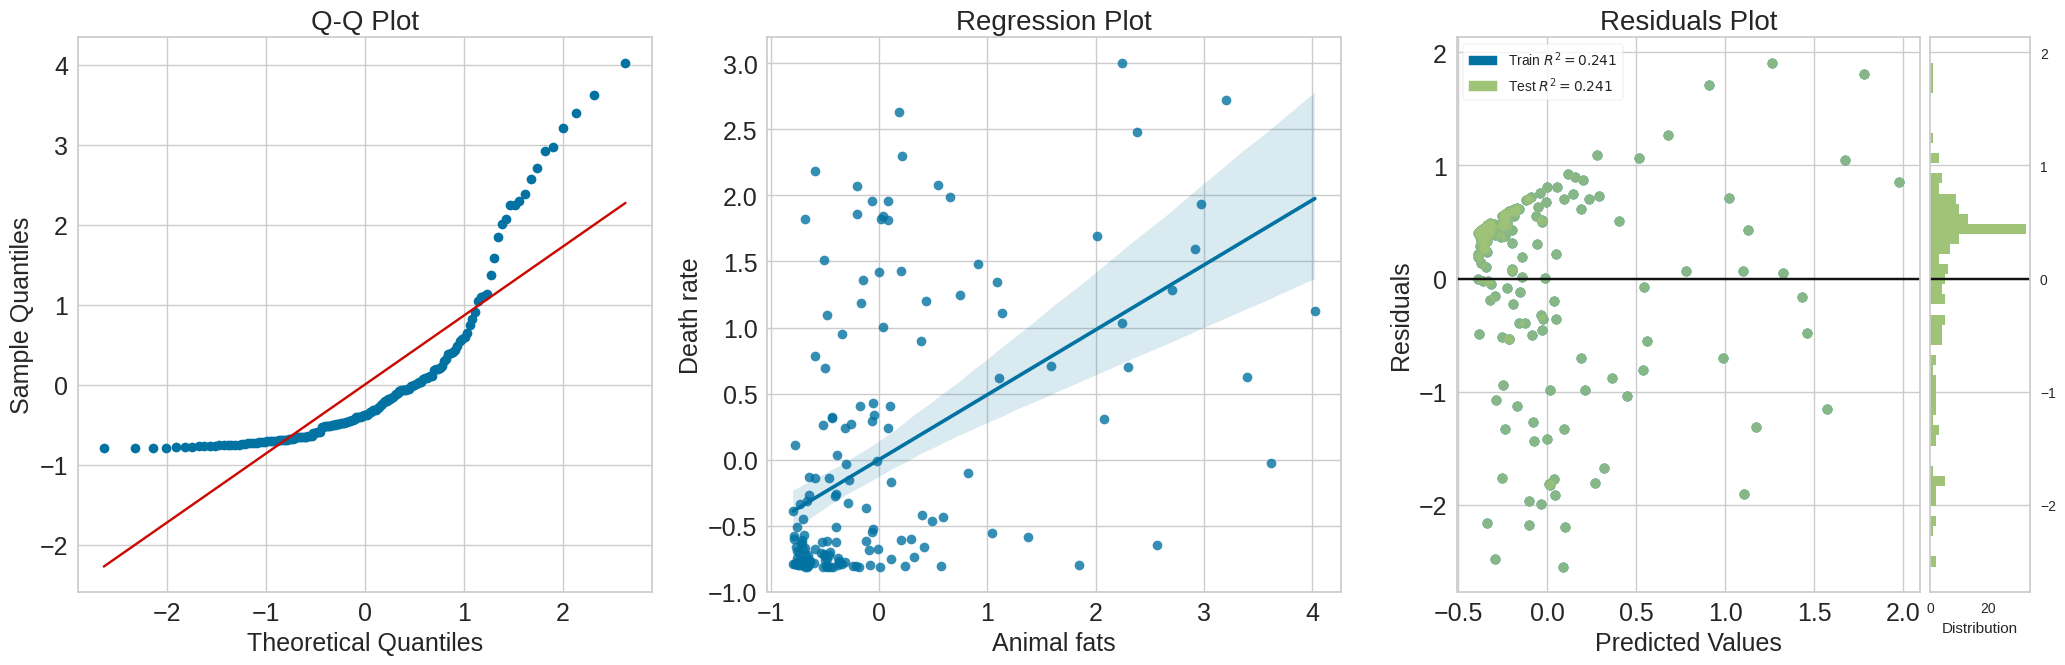

Visualizing assumptions for feature: Animal Products


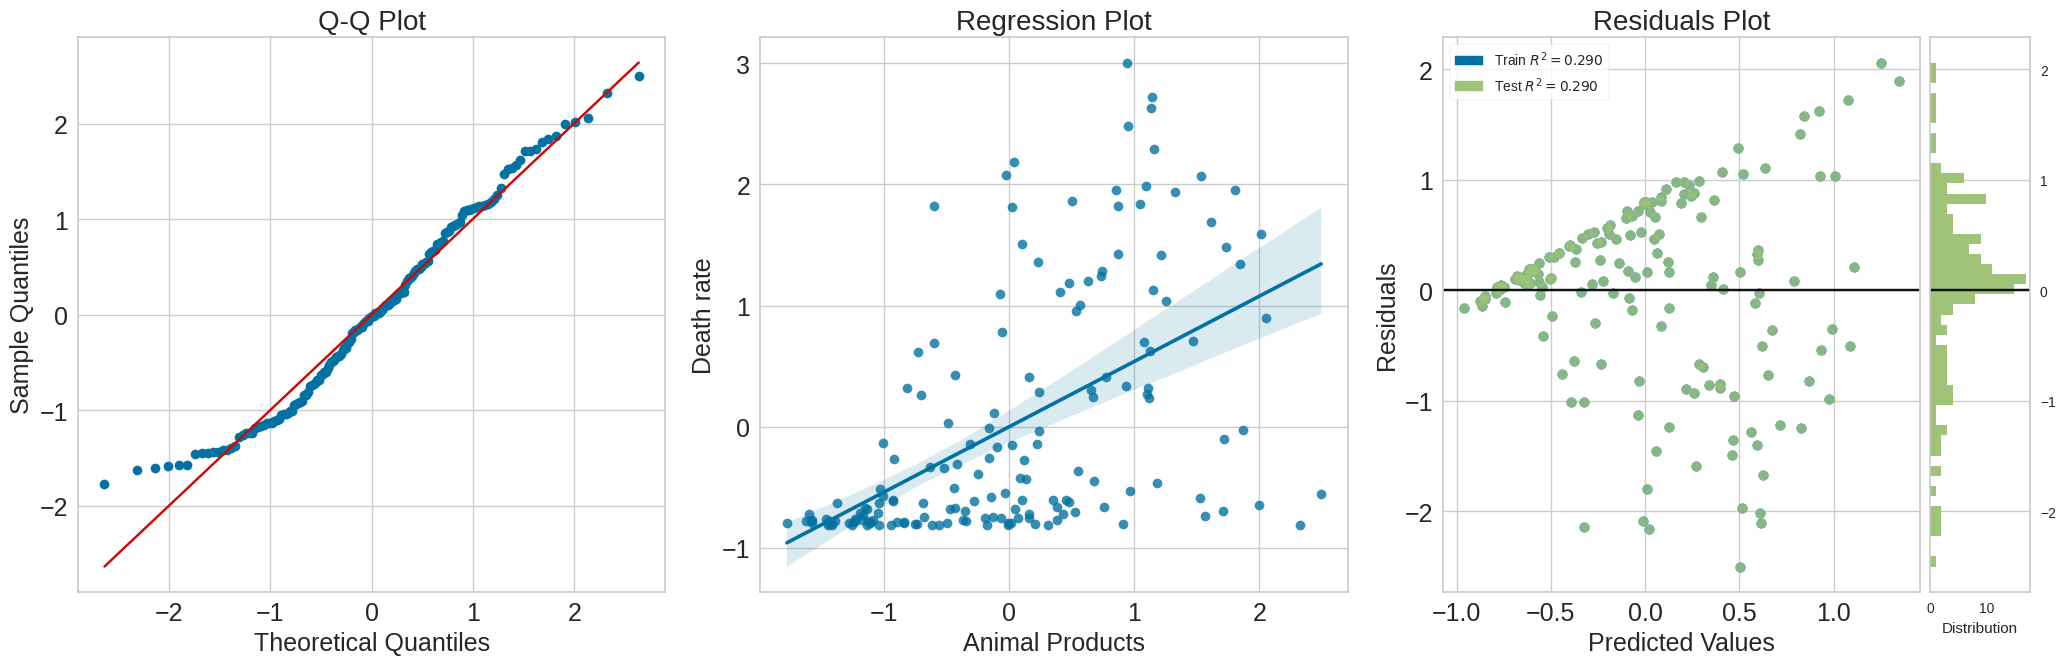

Visualizing assumptions for feature: Cereals - Excluding Beer


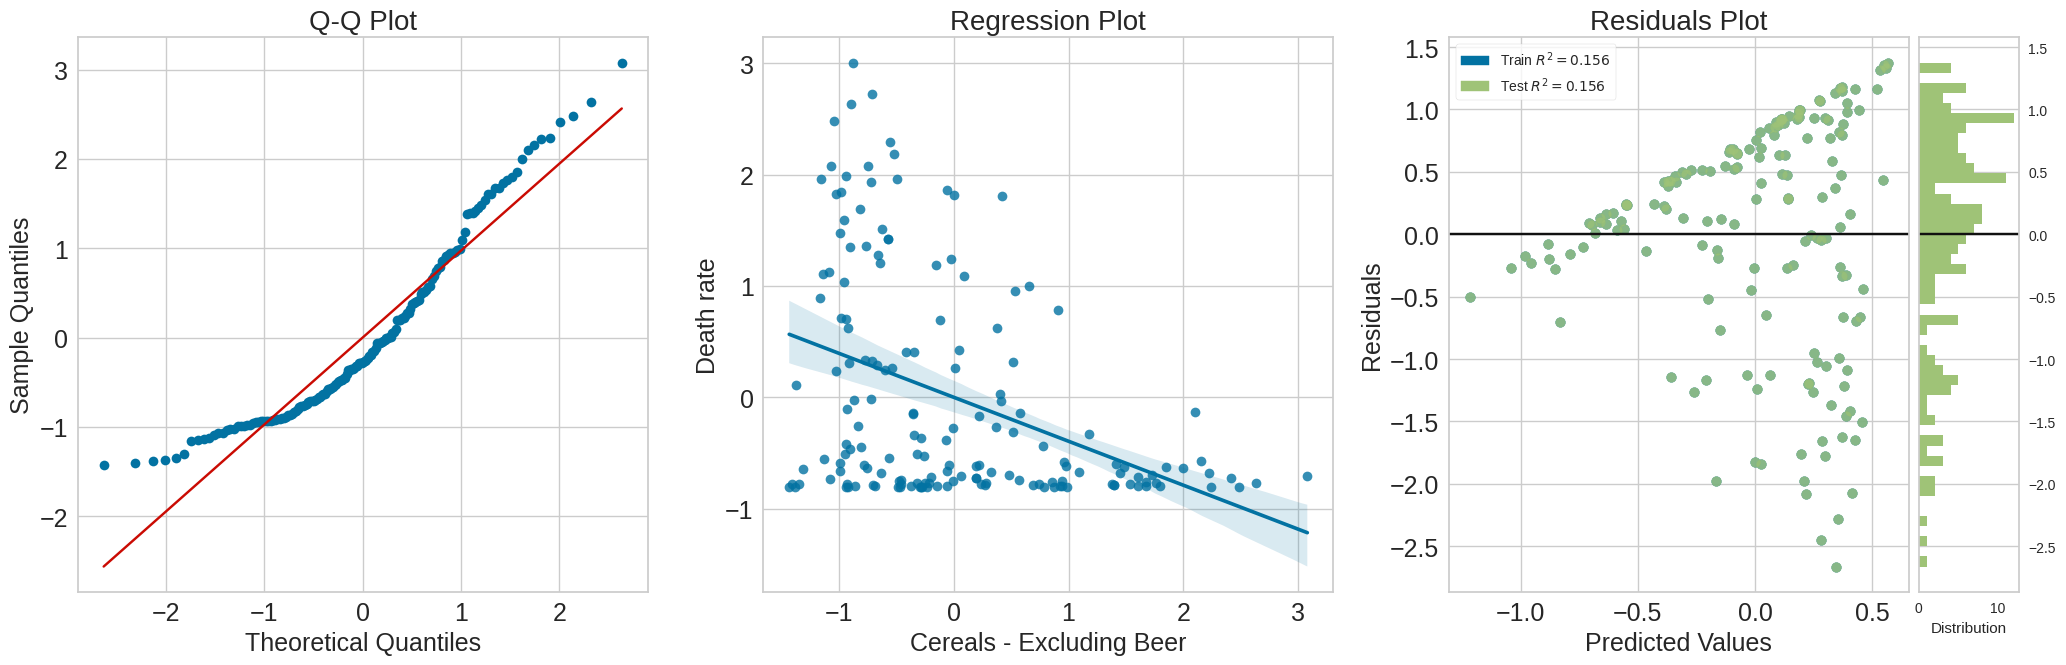

Visualizing assumptions for feature: Eggs


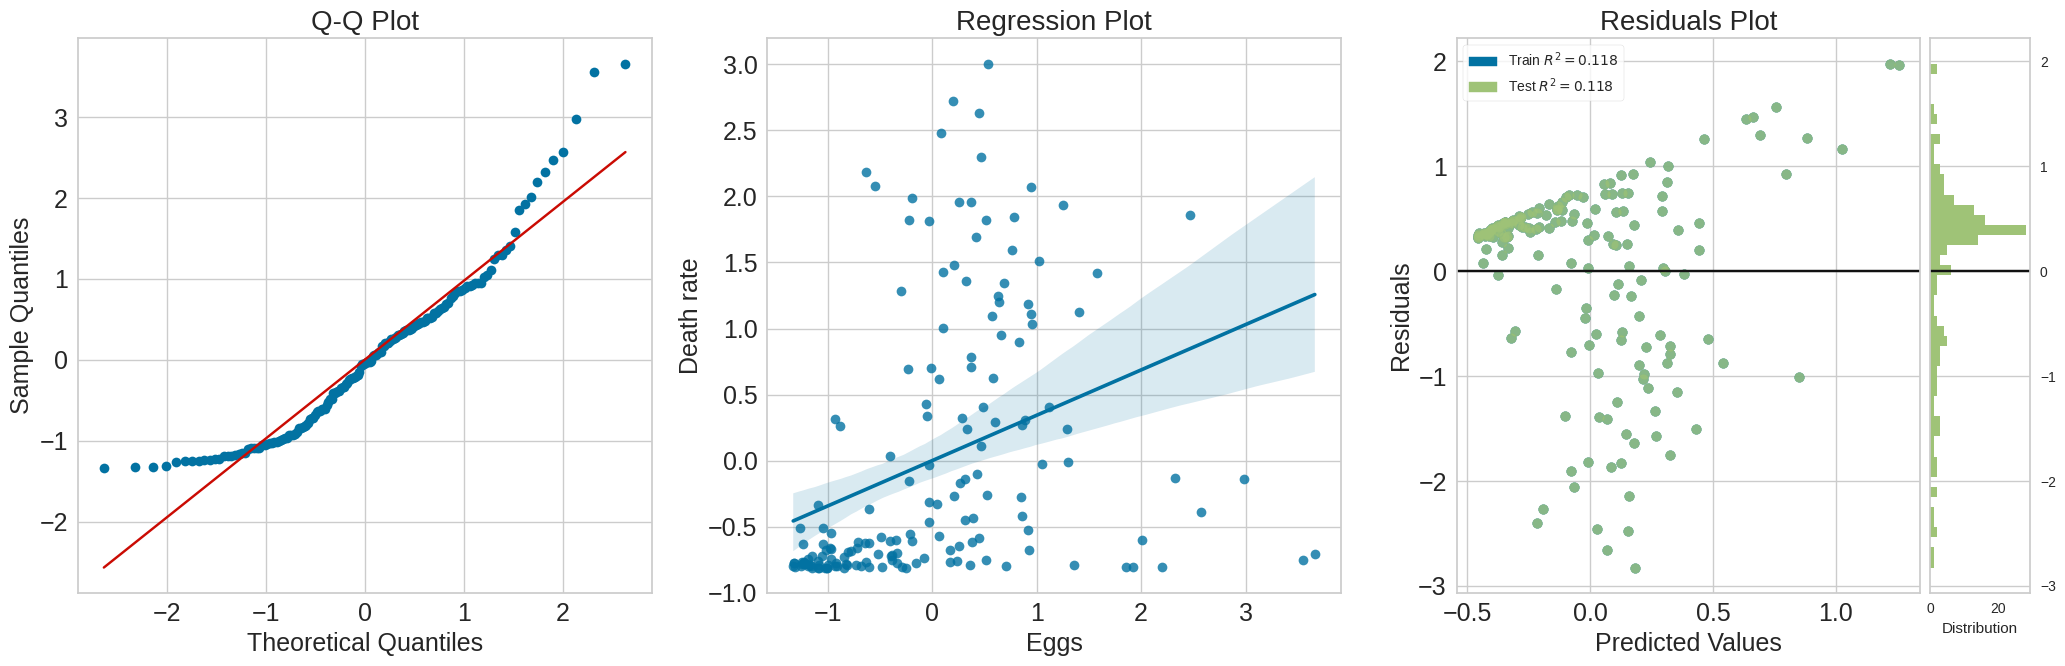

Visualizing assumptions for feature: Fish, Seafood


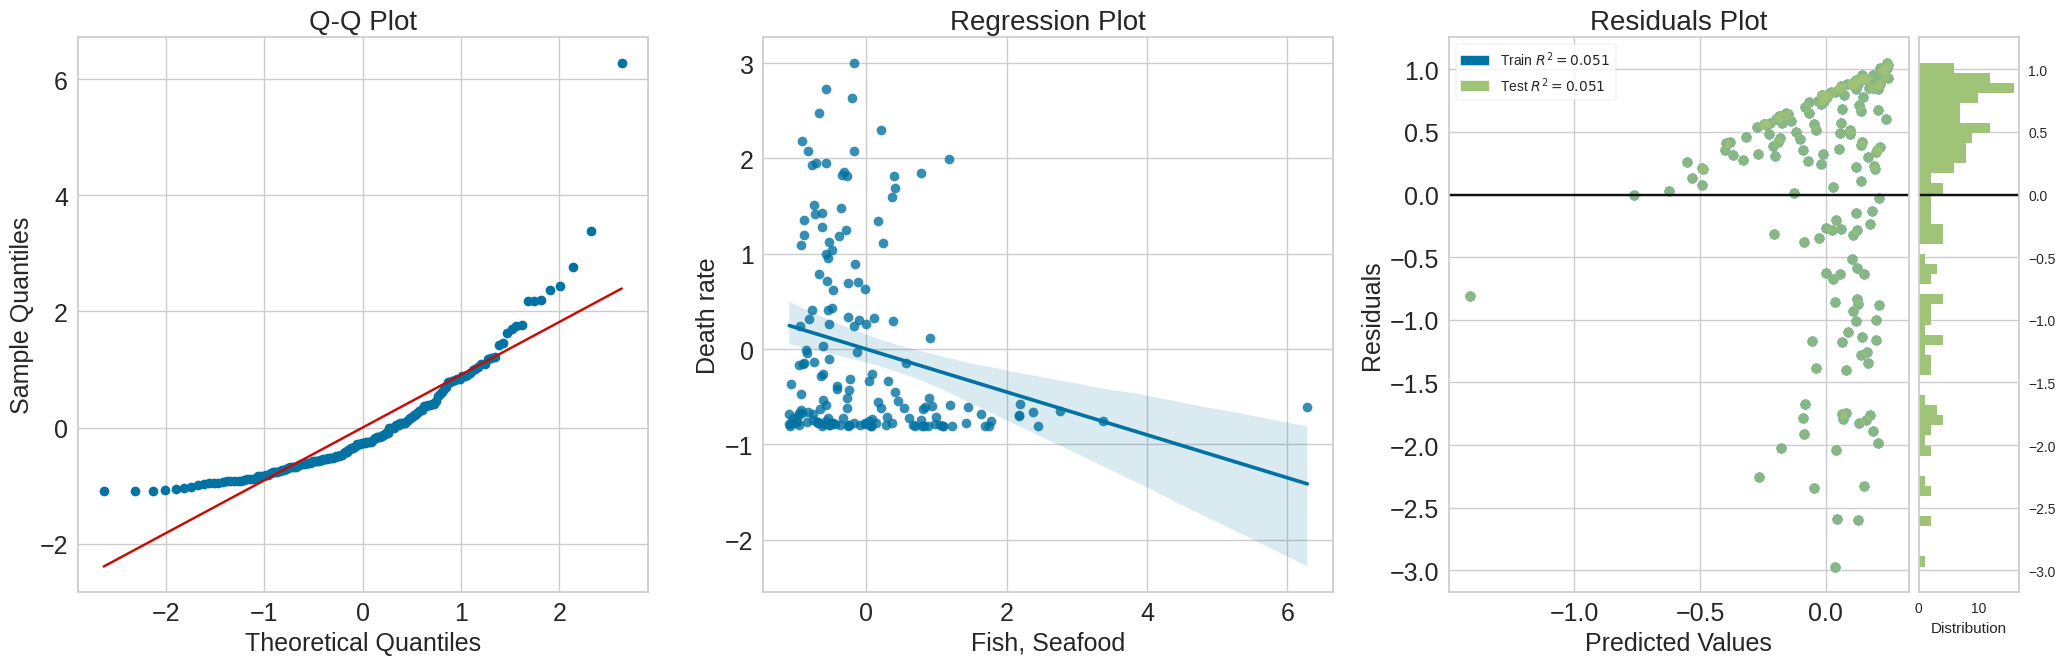

Visualizing assumptions for feature: Fruits - Excluding Wine


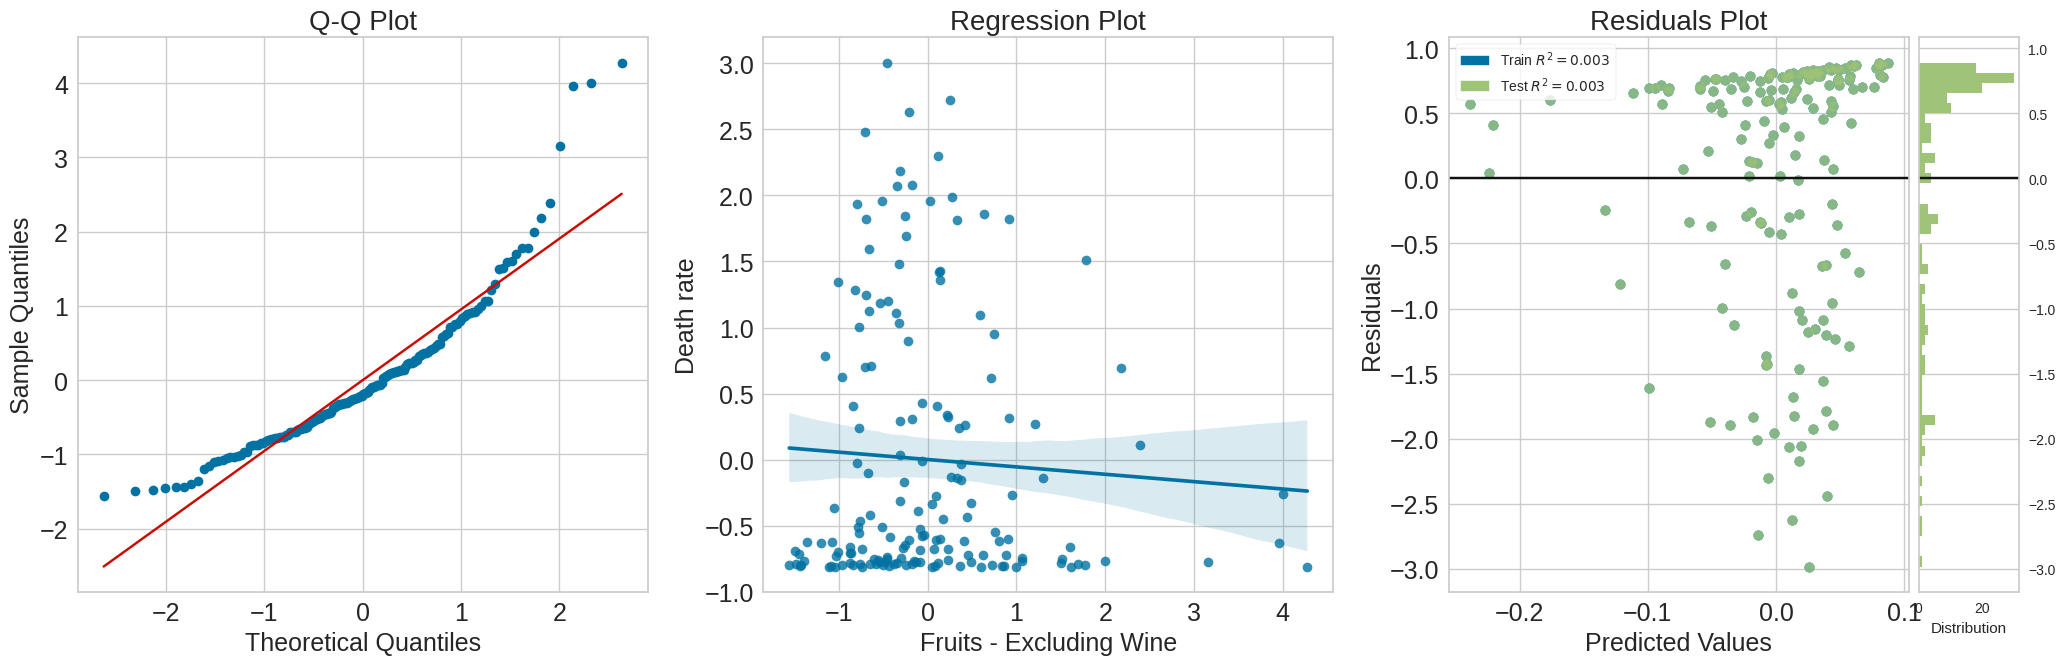

Visualizing assumptions for feature: Meat


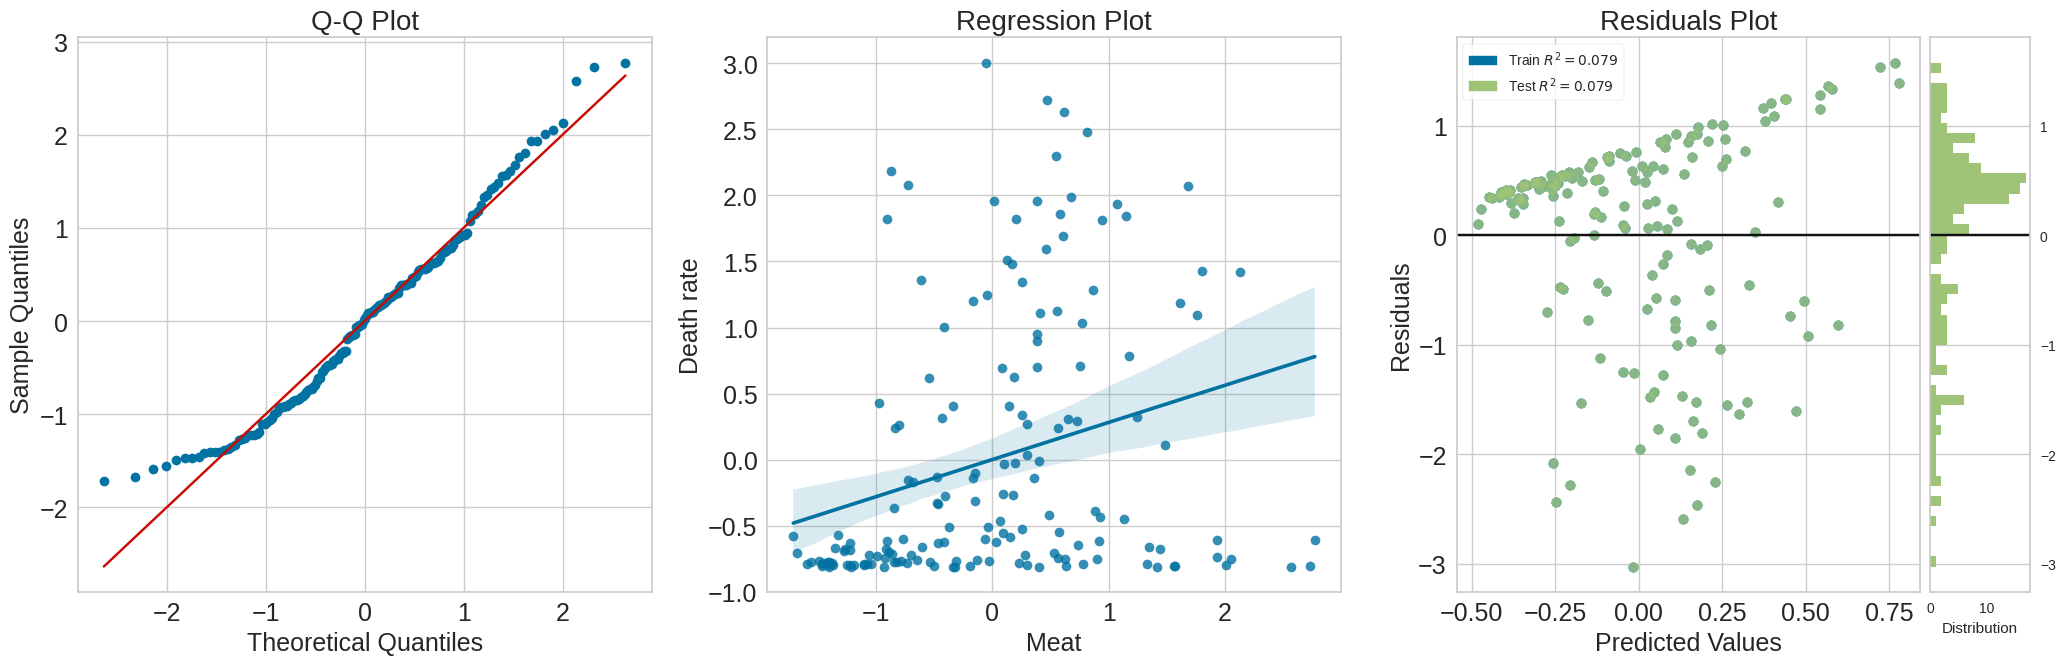

Visualizing assumptions for feature: Milk - Excluding Butter


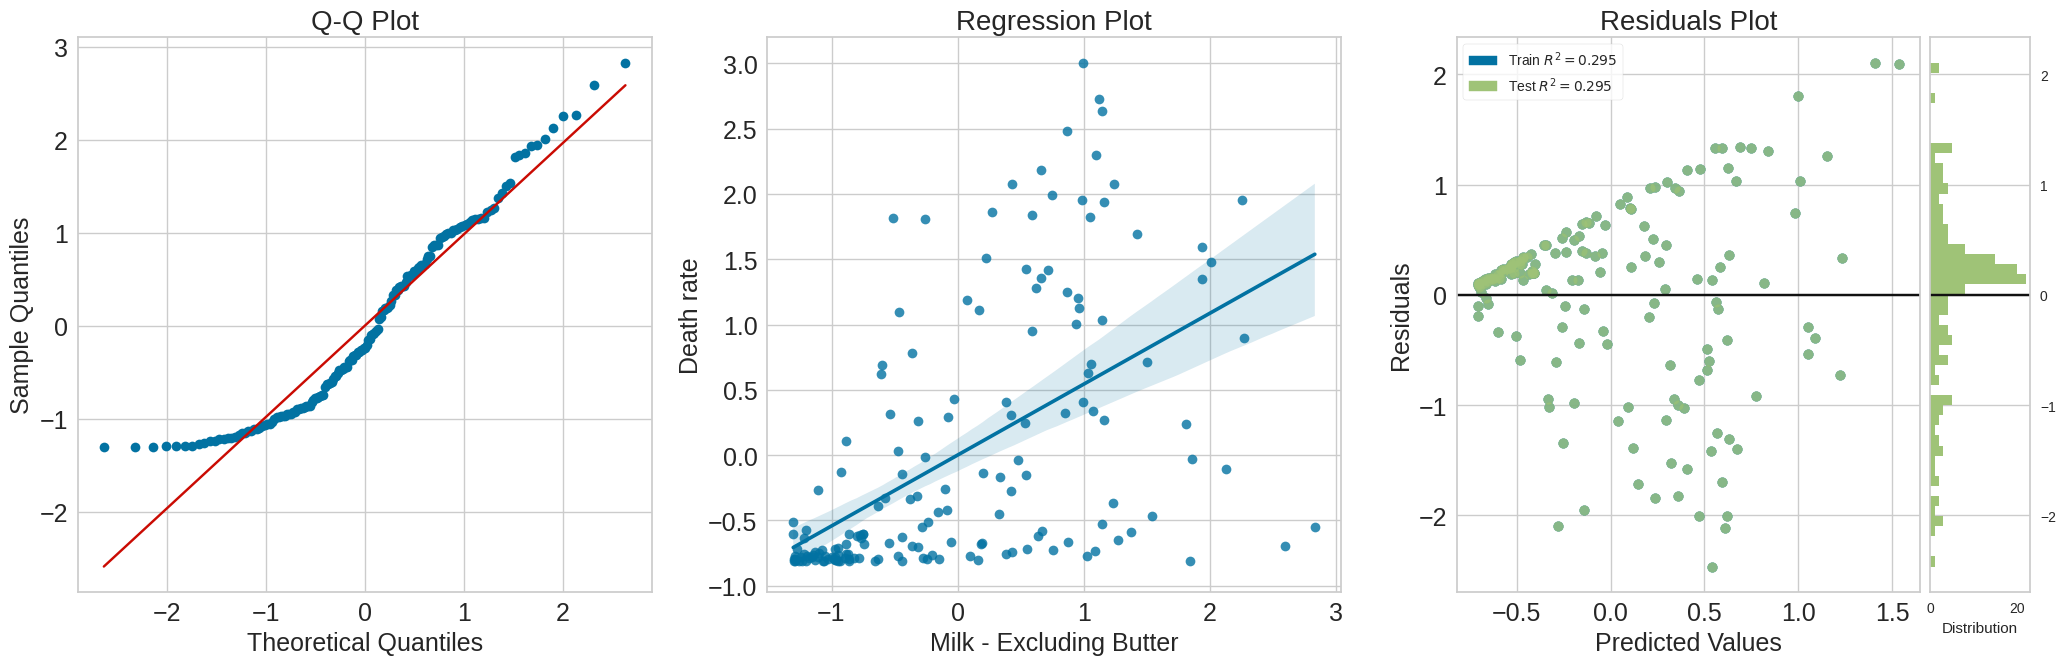

Visualizing assumptions for feature: Miscellaneous


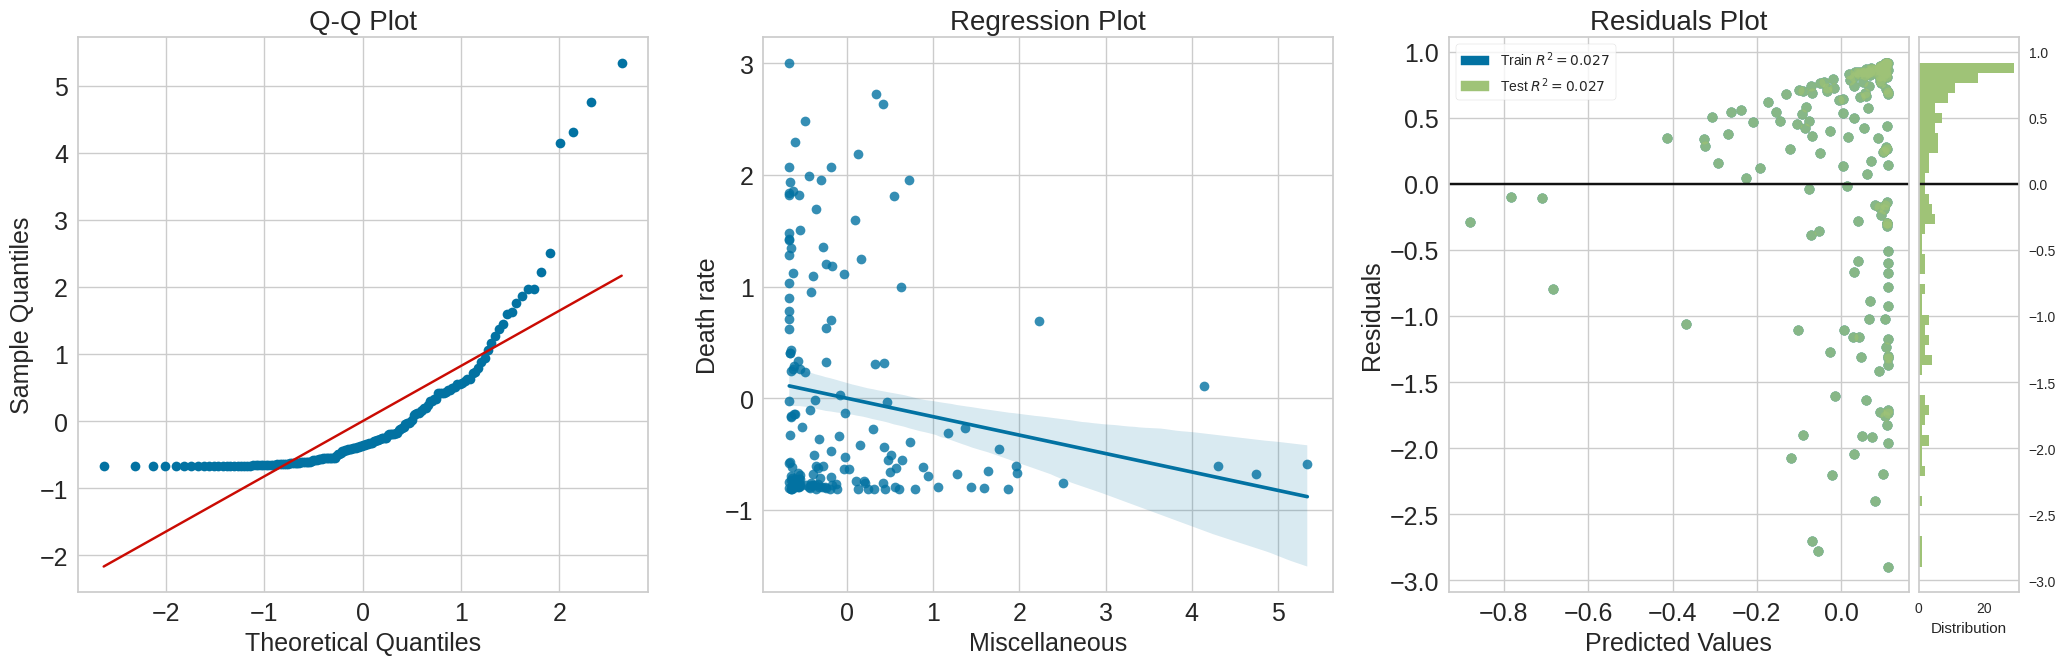

Visualizing assumptions for feature: Offals


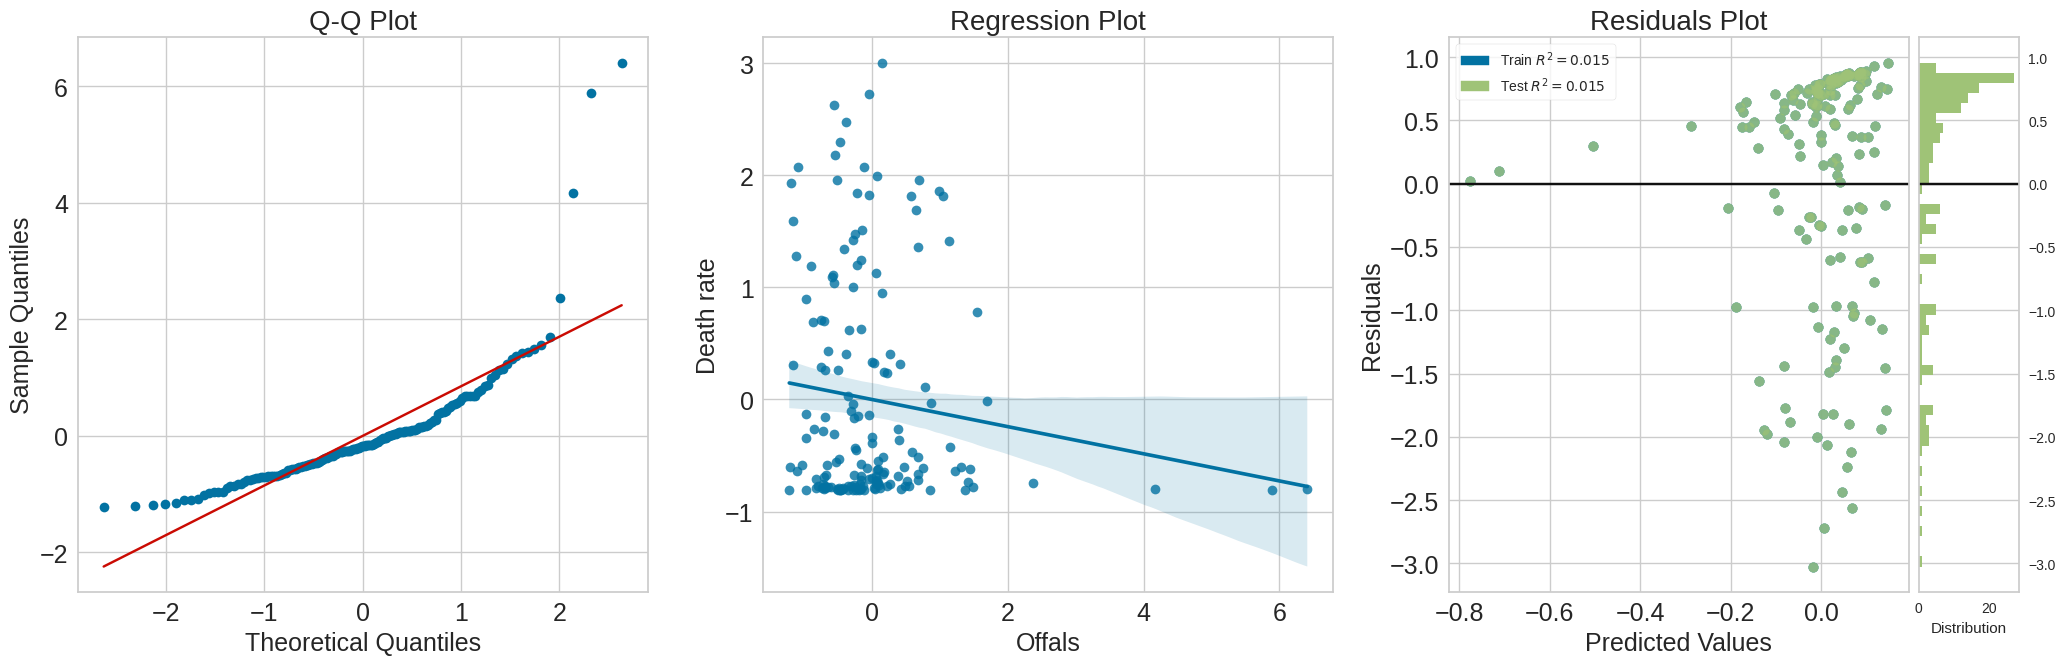

Visualizing assumptions for feature: Oilcrops


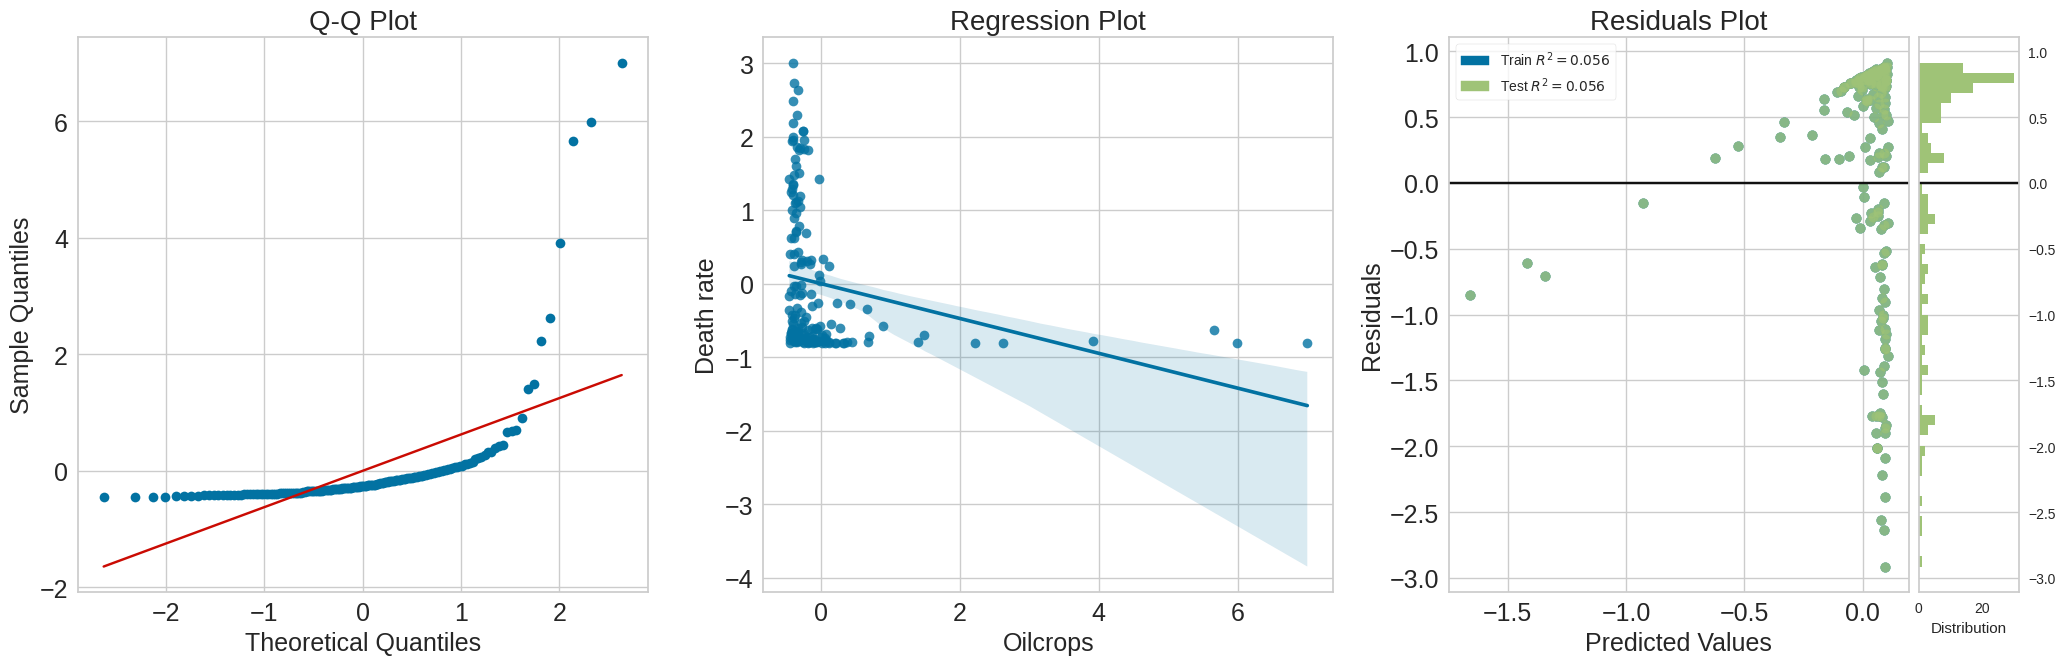

Visualizing assumptions for feature: Pulses


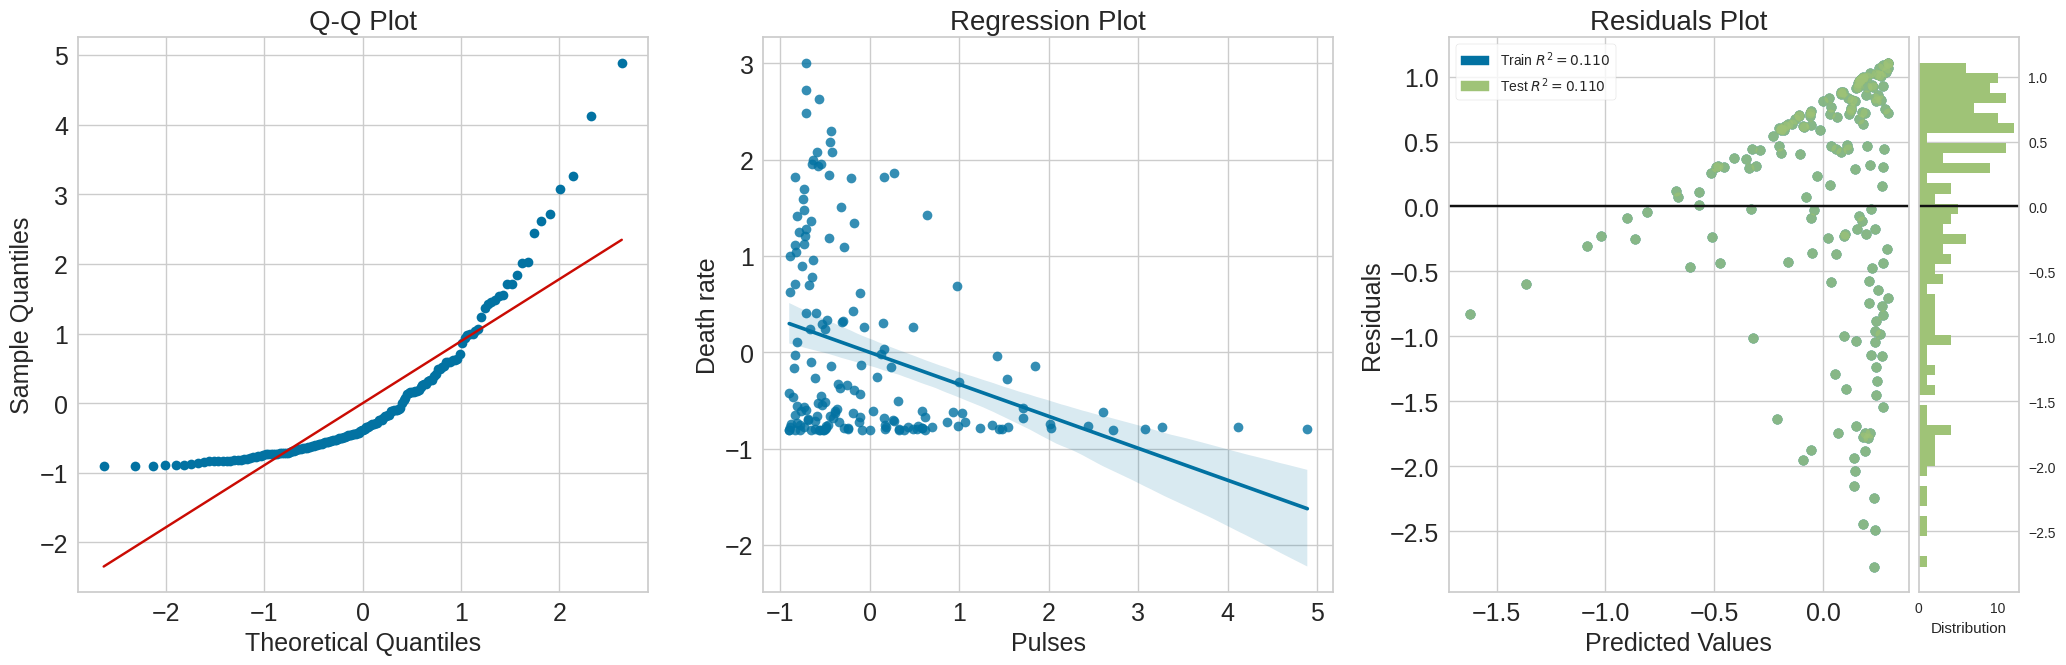

Visualizing assumptions for feature: Spices


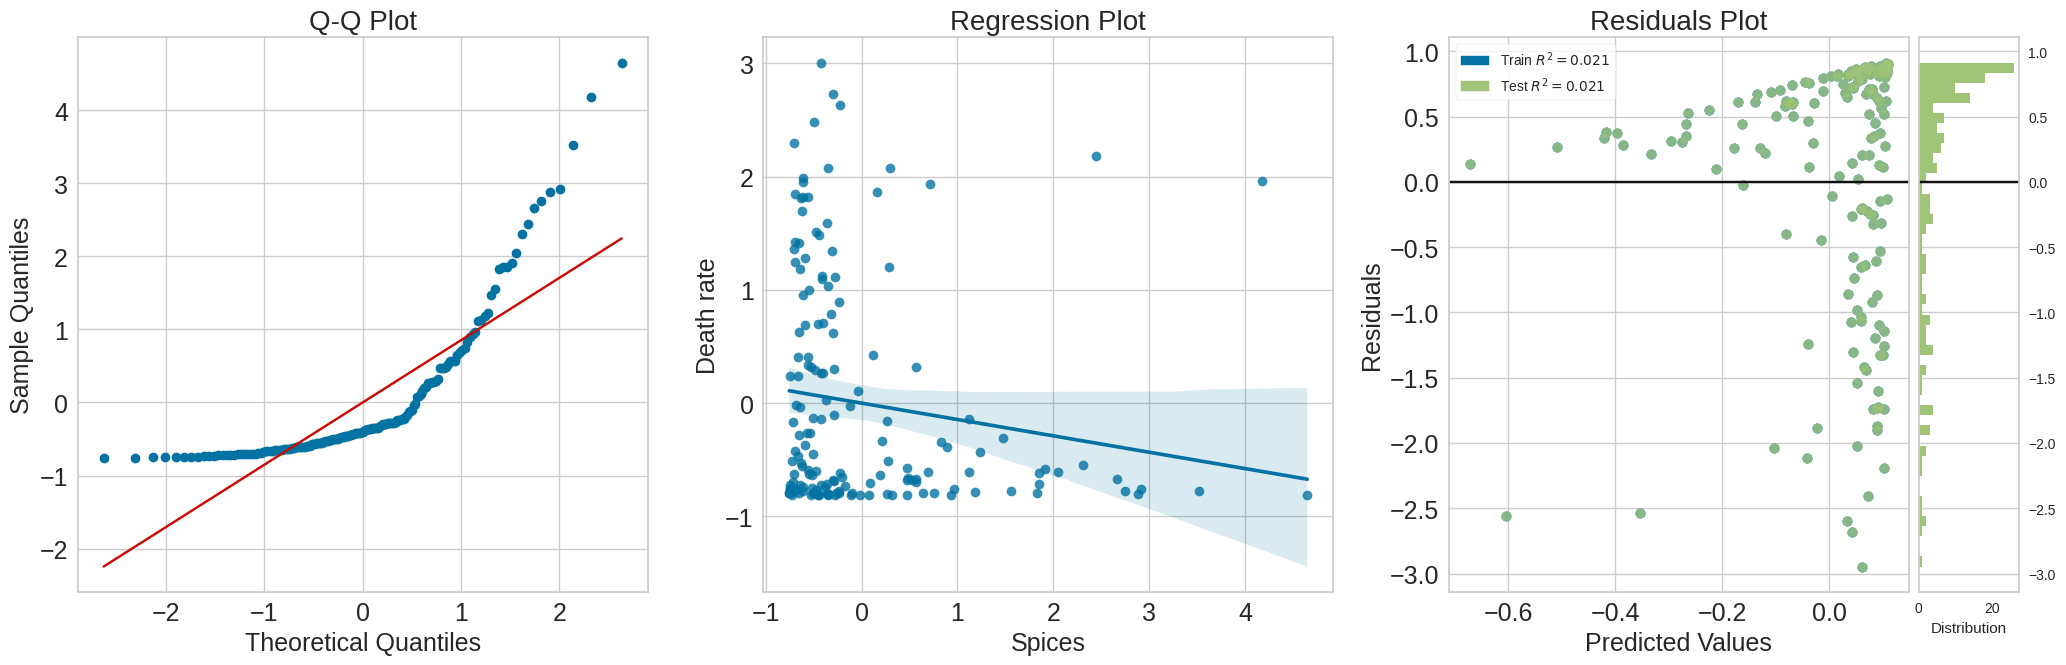

Visualizing assumptions for feature: Starchy Roots


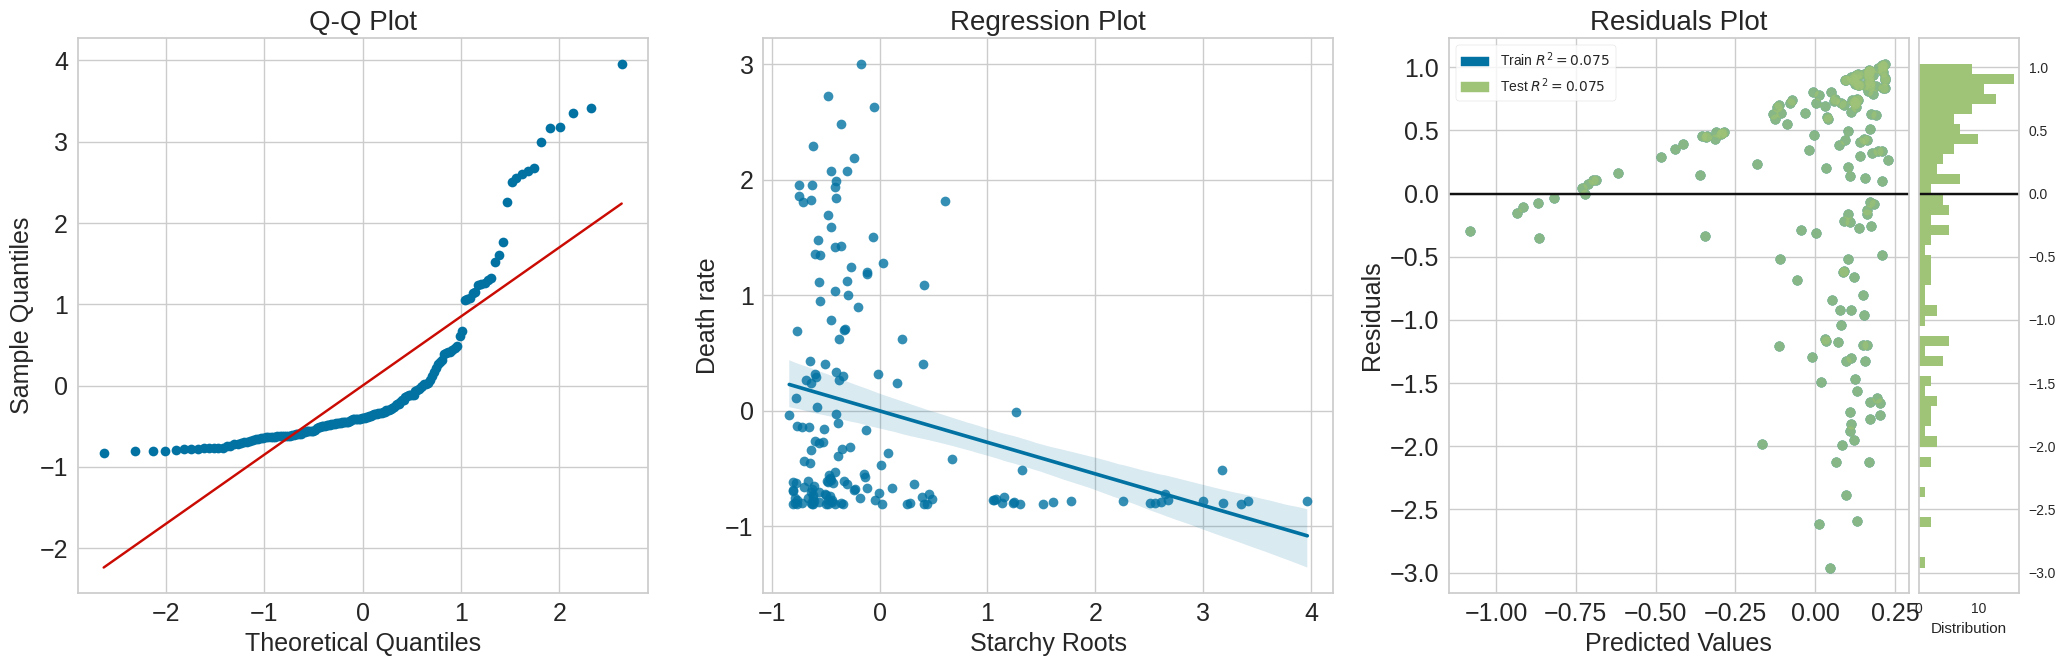

Visualizing assumptions for feature: Stimulants


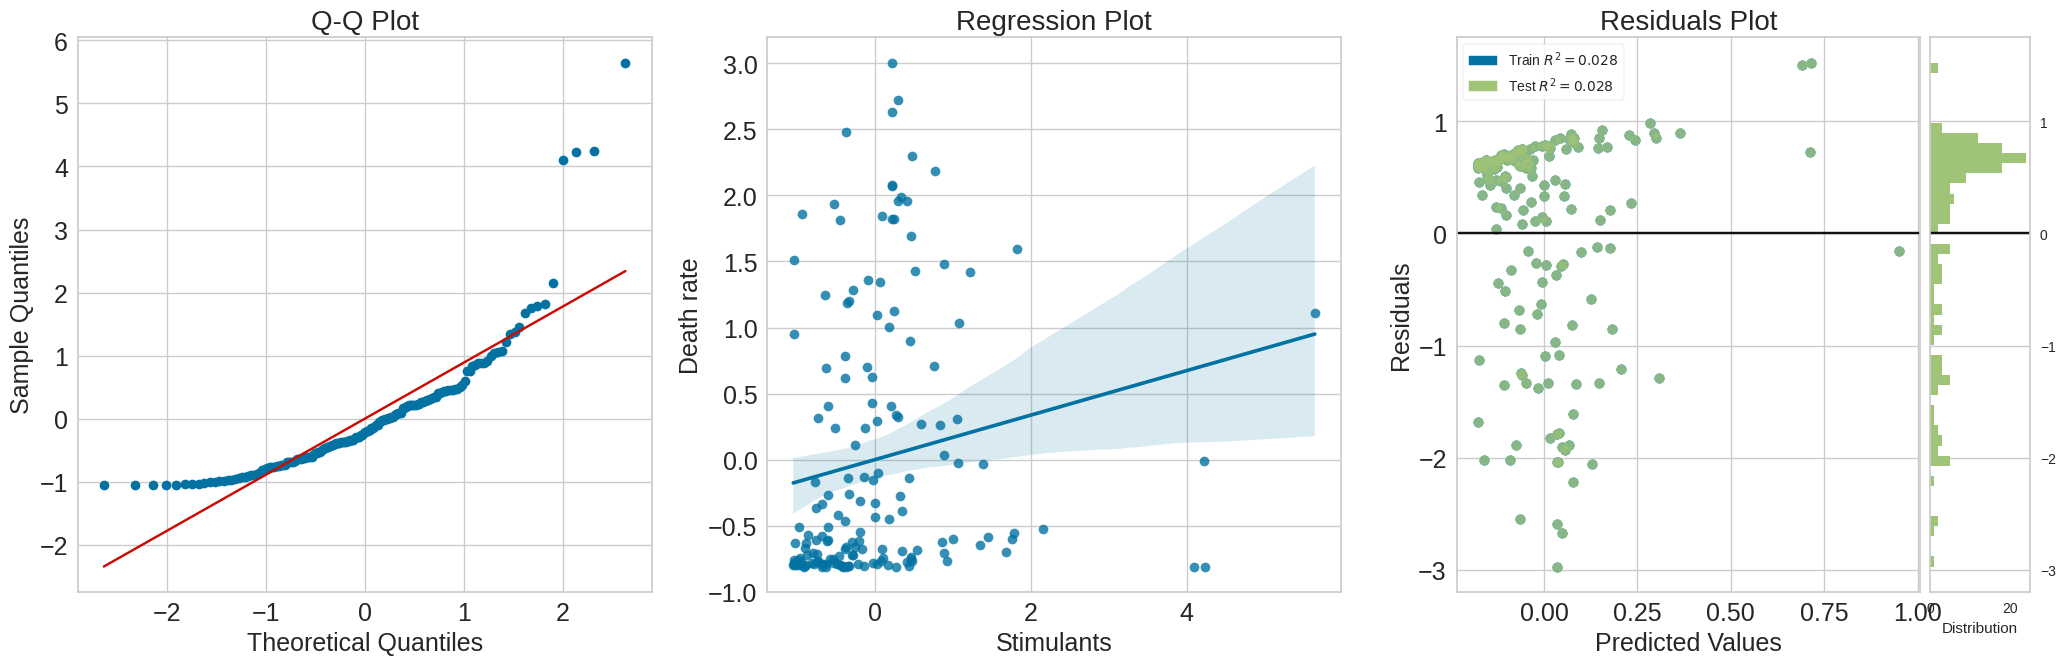

Visualizing assumptions for feature: Sugar & Sweeteners


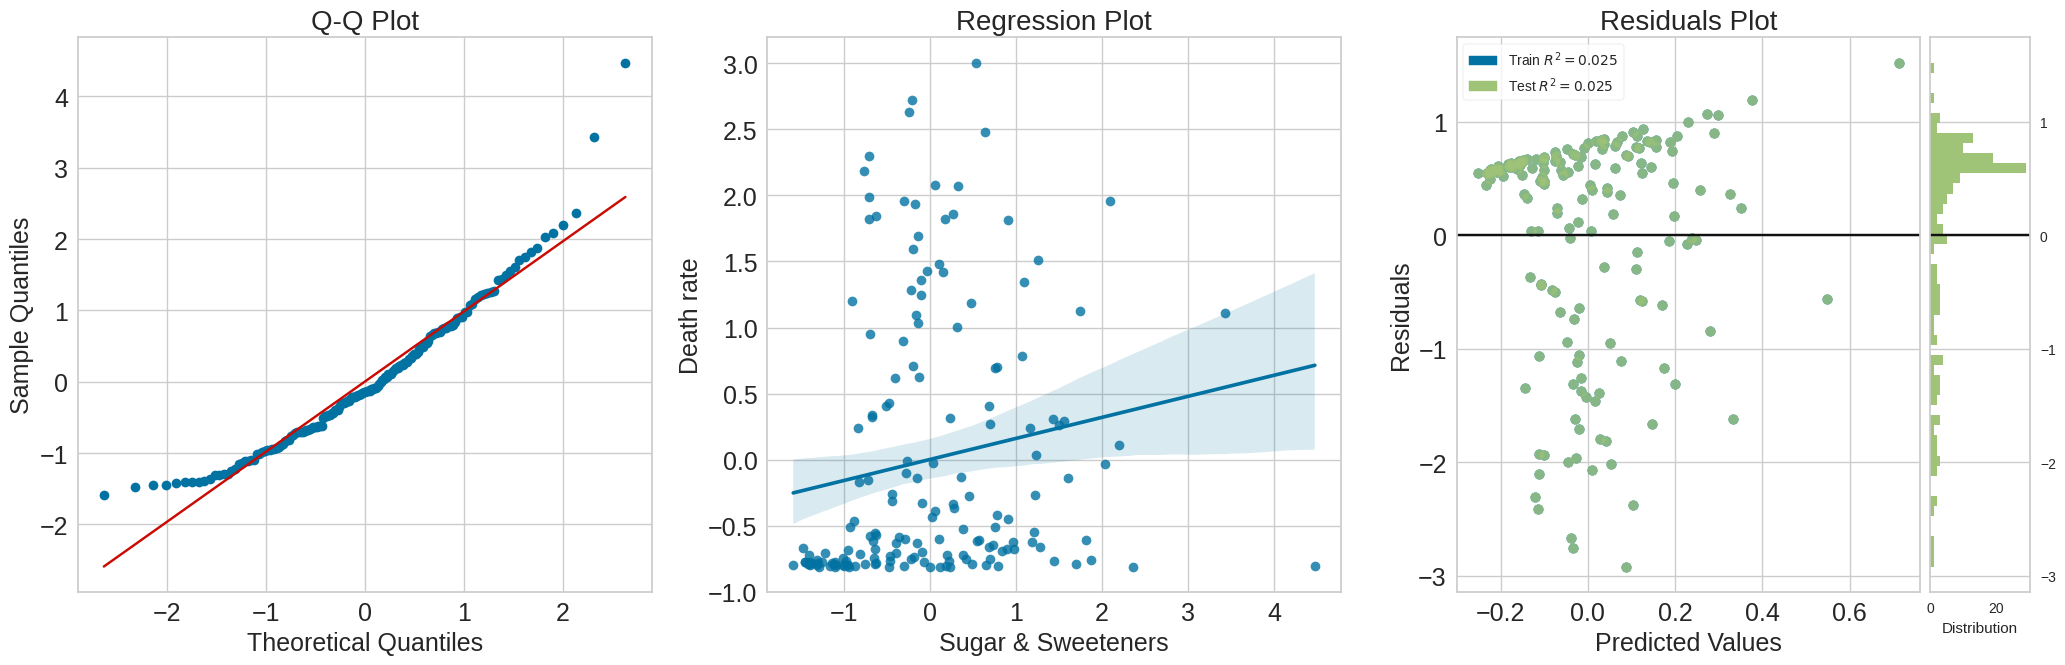

Visualizing assumptions for feature: Treenuts


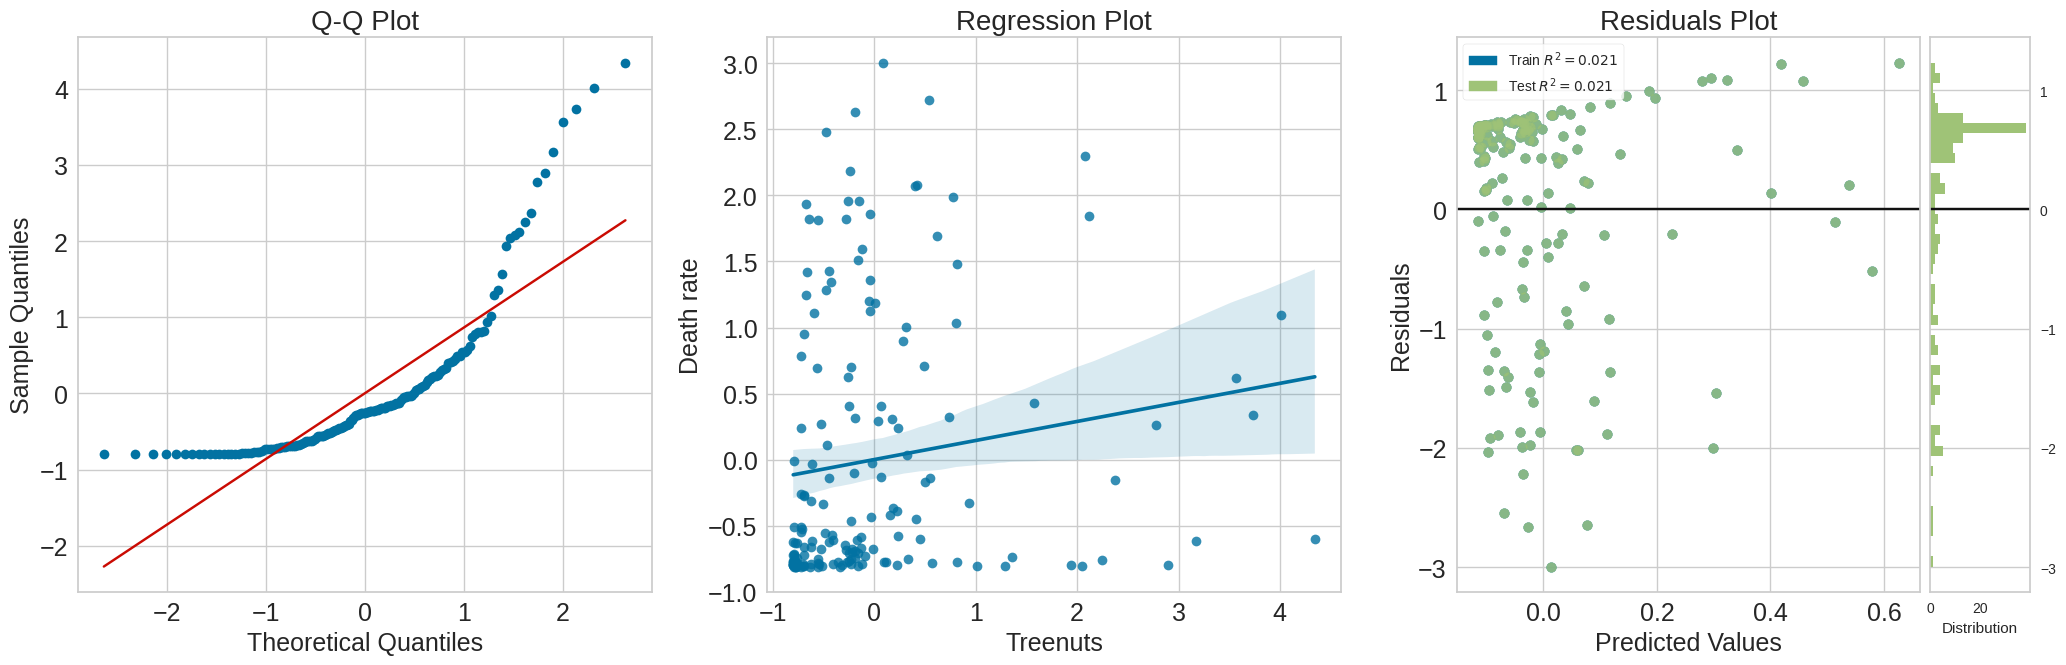

Visualizing assumptions for feature: Vegetable Oils


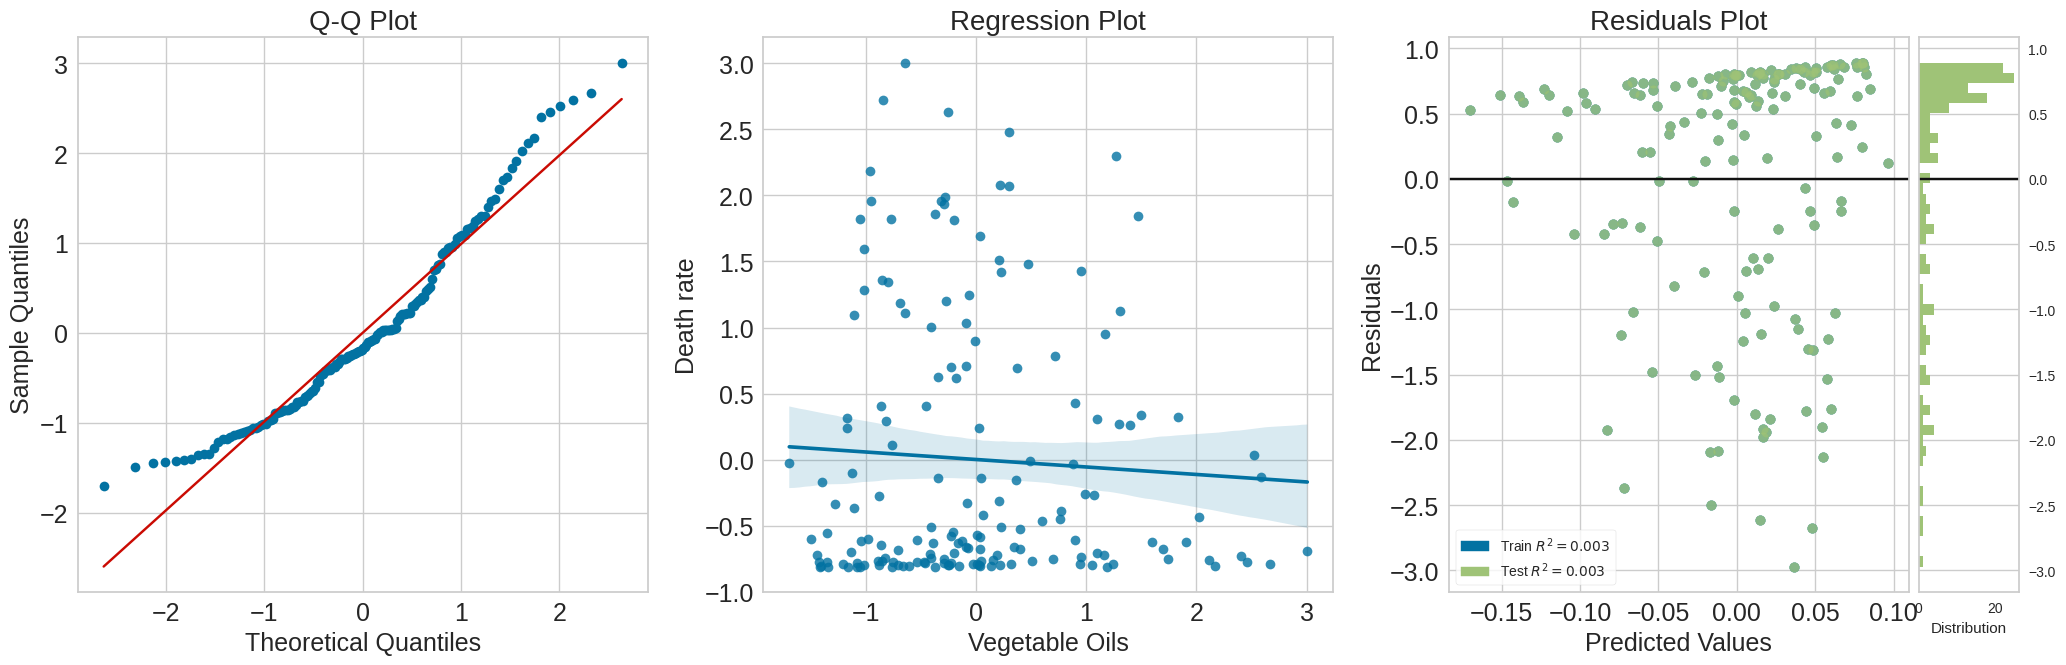

Visualizing assumptions for feature: Vegetal Products


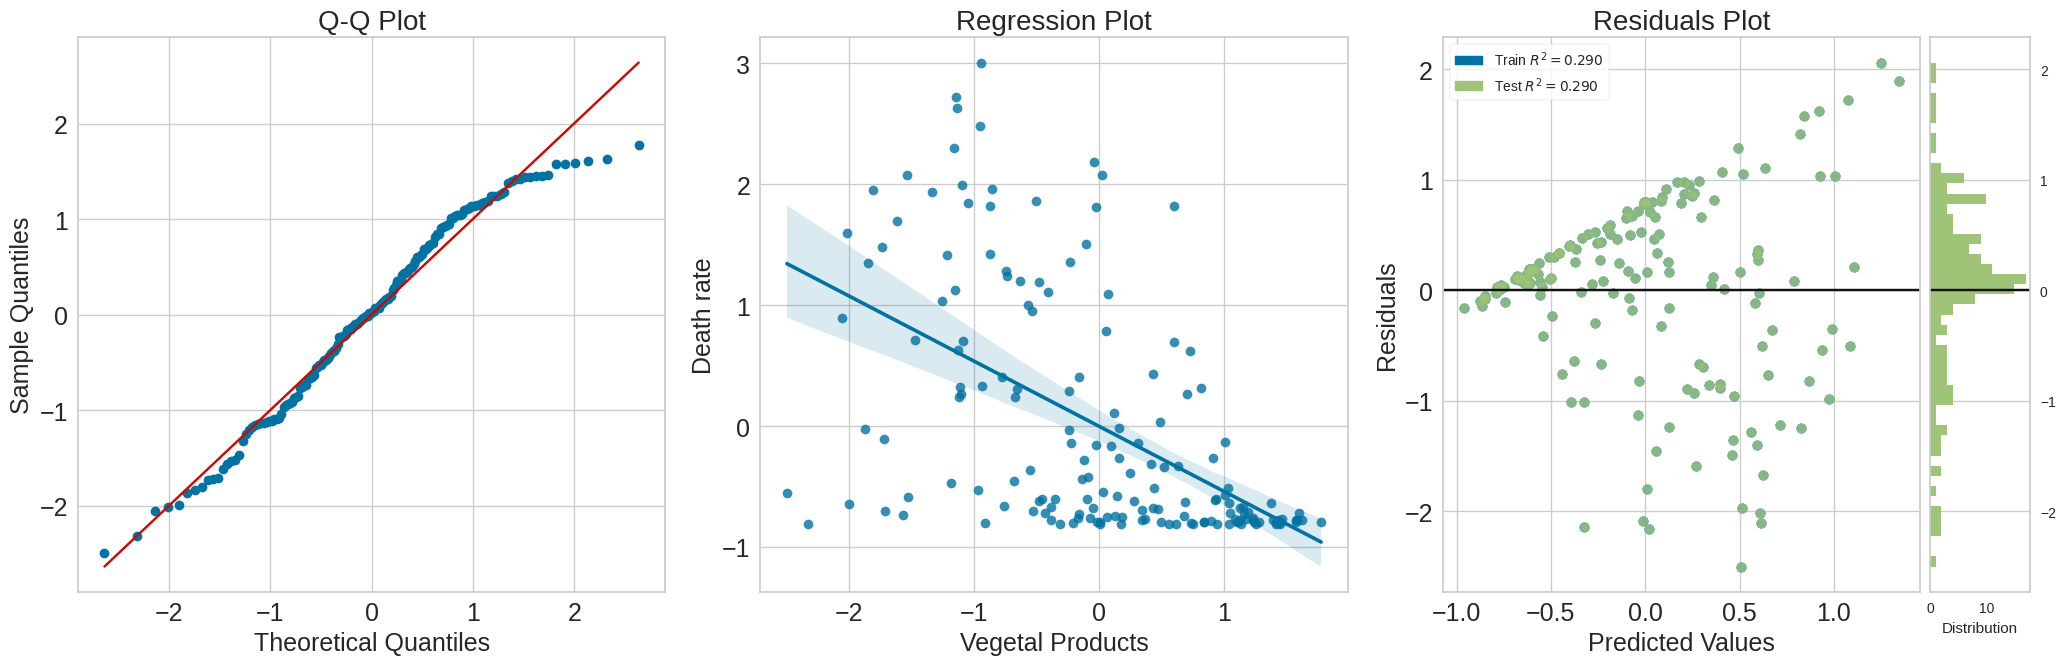

In [ ]:
def visualize_linear_model_assumptions(df, variable):
    plt.rcParams.update({'font.size': 18})

    fig, axs = plt.subplots(1, 3, figsize=(21, 7))

    # Q-Q plot
    stats.probplot(df[variable], dist='norm', plot=axs[0])
    axs[0].set_title('Q-Q Plot', fontsize=20)
    axs[0].set_xlabel('Theoretical Quantiles', fontsize=18)
    axs[0].set_ylabel('Sample Quantiles', fontsize=18)
    axs[0].tick_params(axis='both', labelsize=18)

    # Regression plot
    sns.regplot(x=variable, y='Death rate', data=df, order=1, ax=axs[1])
    axs[1].set_title('Regression Plot', fontsize=20)
    axs[1].set_xlabel(variable, fontsize=18)
    axs[1].set_ylabel('Death rate', fontsize=18)
    axs[1].tick_params(axis='both', labelsize=18)

    # Residuals plot
    X = df[[variable]]
    y = df['Death rate']
    model = LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    predictions = cross_val_predict(model, X, y, cv=kf)

    visualizer = ResidualsPlot(model, ax=axs[2])
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.finalize()

    axs[2].set_title('Residuals Plot', fontsize=20)
    axs[2].set_xlabel('Predicted Values', fontsize=18)
    axs[2].set_ylabel('Residuals', fontsize=18)
    axs[2].tick_params(axis='both', labelsize=18)

    plt.tight_layout()
    plt.show()

# Step 1: Visualizations
for feature in Independent_features:
    print(f"Visualizing assumptions for feature: {feature}")
    visualize_linear_model_assumptions(df_standardized_without_countries, feature)

**Box_plot of Death rate**

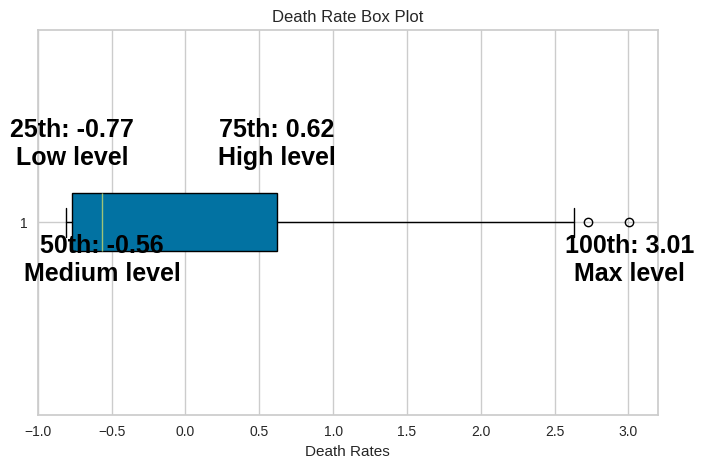

In [ ]:
death_rates = df_standardized_without_countries['Death rate']

# Calculate percentiles including the max value for the 100th percentile
percentiles = np.percentile(death_rates, [25, 50, 75])
max_value = np.max(death_rates)  # This represents the 100th percentile

# Create a box plot
plt.figure(figsize=(8, 5))
boxplot = plt.boxplot(death_rates, vert=False, patch_artist=True)
plt.title('Death Rate Box Plot')
plt.xlabel('Death Rates')

# Add text annotations for the percentiles
for i, perc in enumerate(percentiles):
    label_pos = 0.85 if i == 1 else 1.15
    plt.text(perc, label_pos, f'{[25, 50, 75][i]}th: {perc:.2f}\n{["Low", "Medium", "High"][i]} level',
             horizontalalignment='center', color='black', weight='semibold')

# Additional label for the maximum value (100th percentile)
plt.text(max_value, 0.85, f'100th: {max_value:.2f}\nMax level',
         horizontalalignment='center', color='black', weight='semibold')

# Show the plot
plt.show()


#### Correlation Analysis

##### Spearman Correlation Matrix Heatmap with clustering

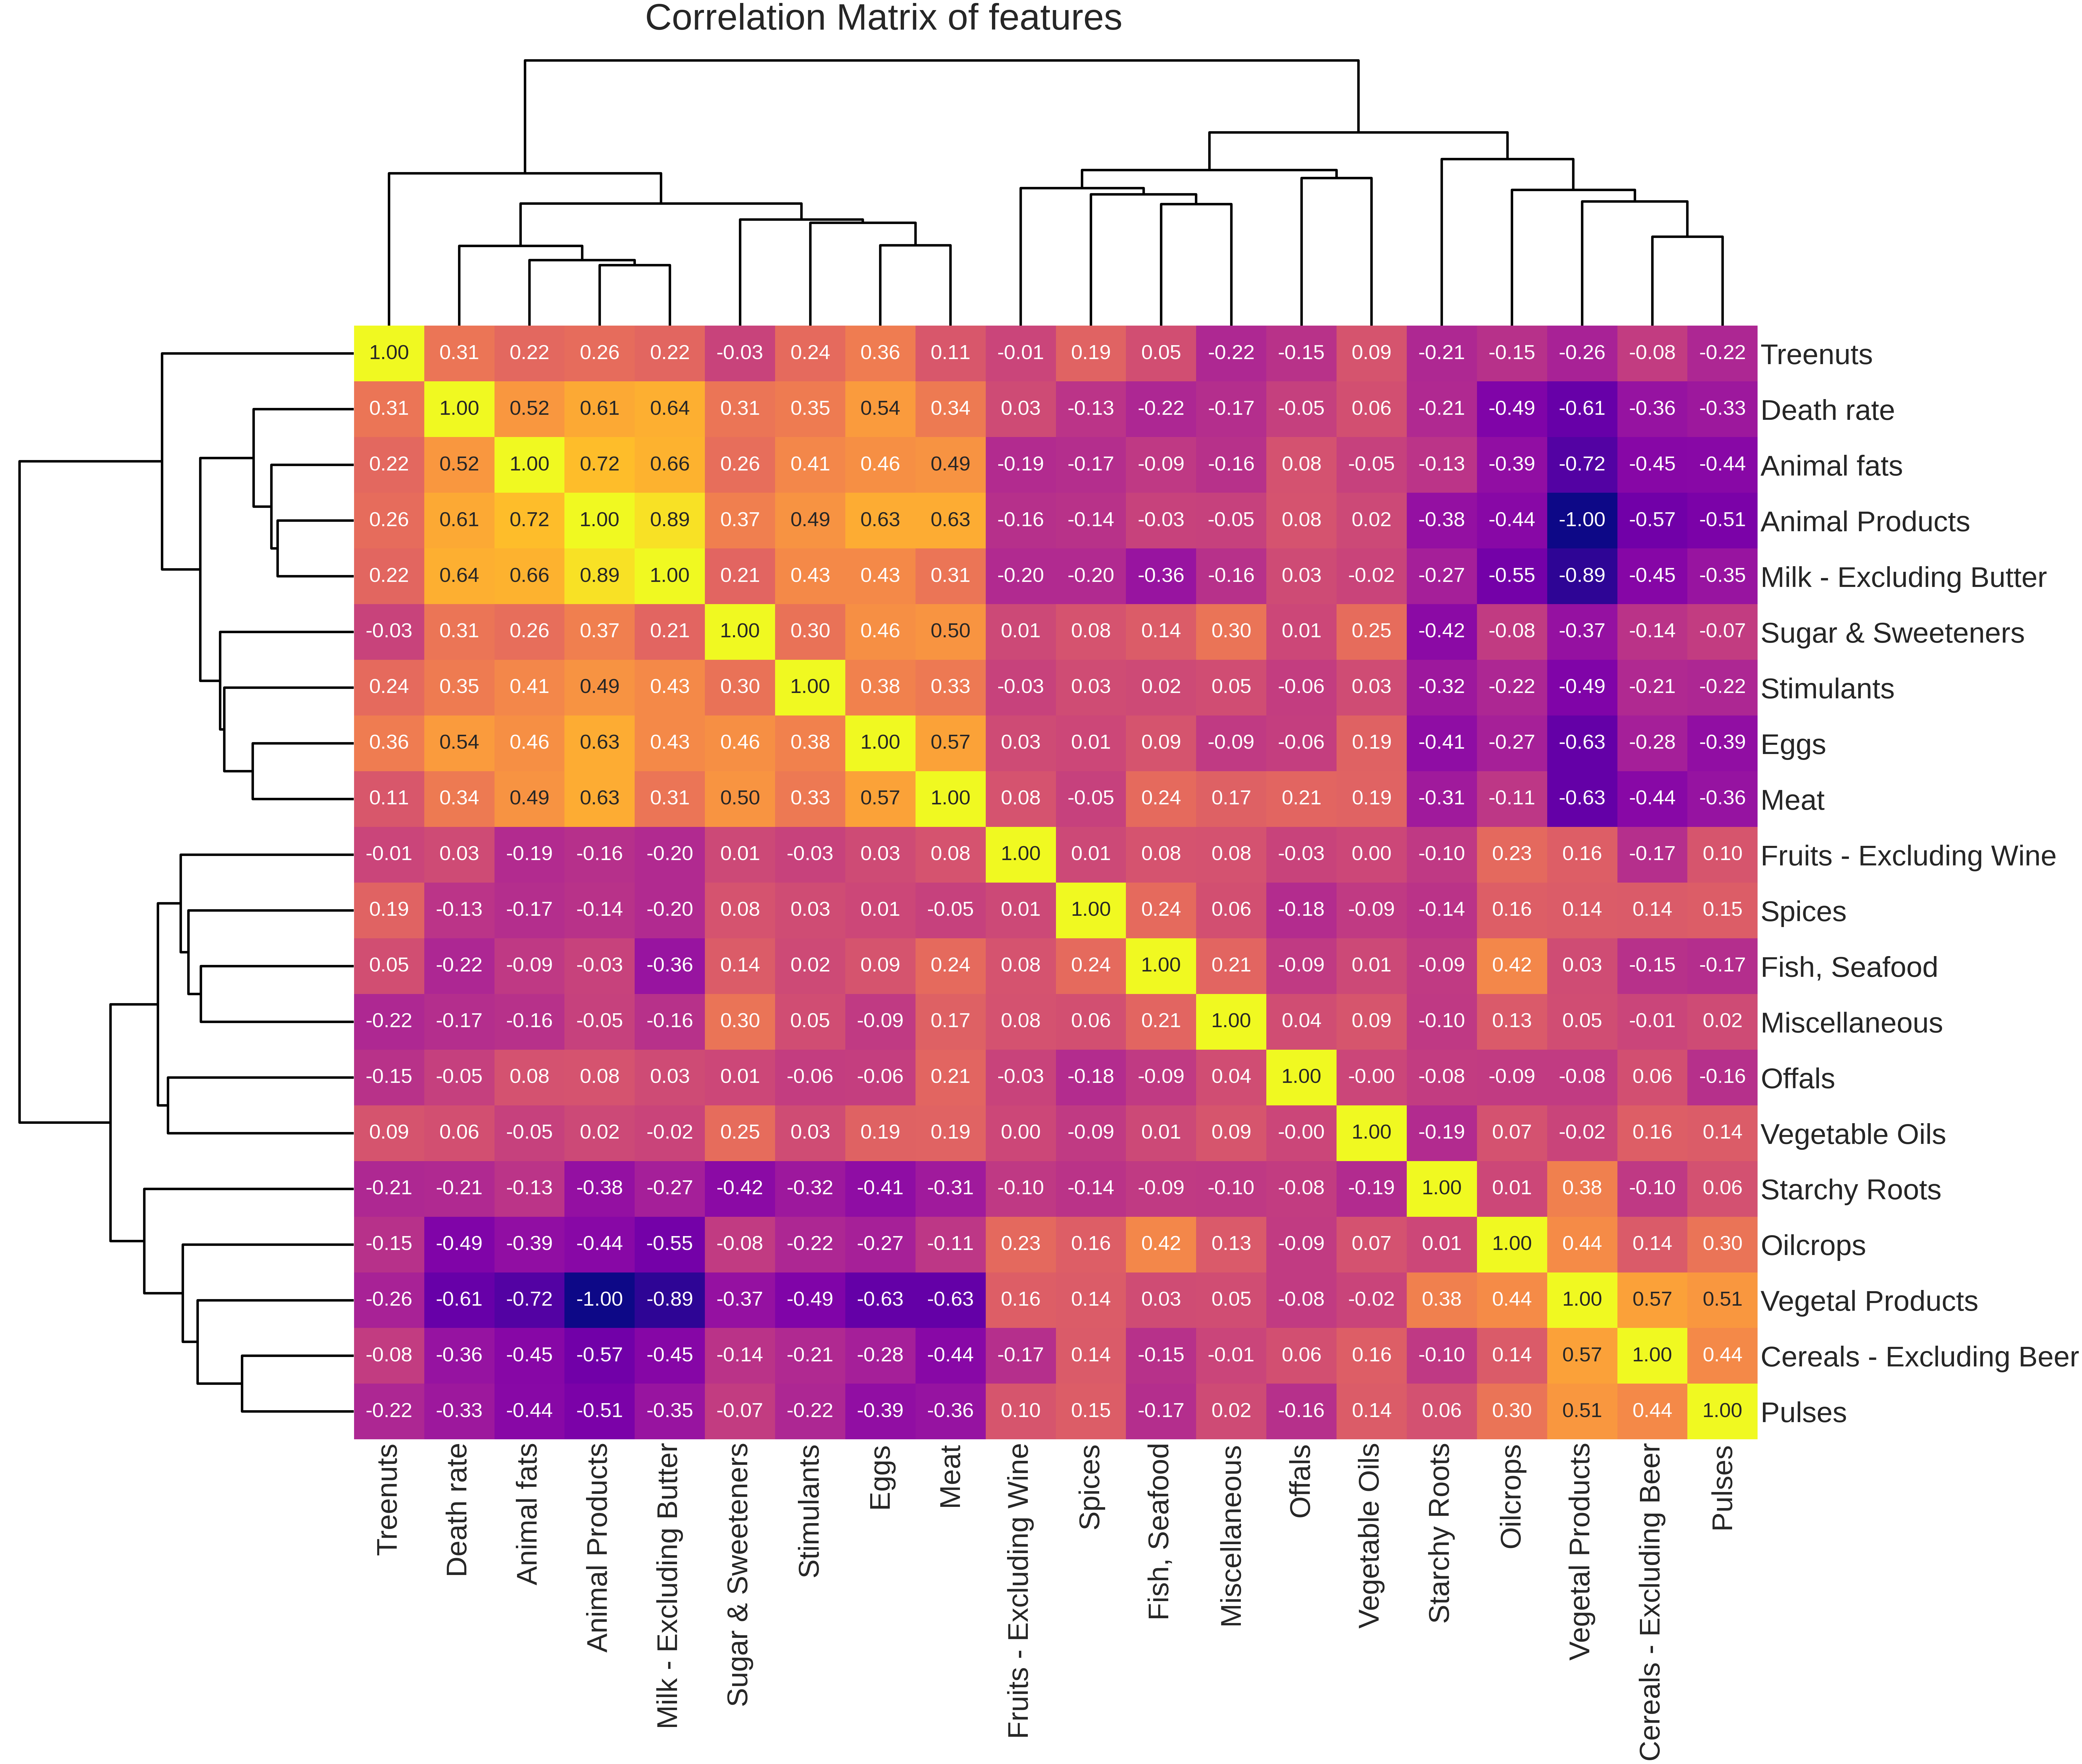

In [ ]:
#full data standrized
corrmat = df_standardized_without_countries.corr(method='spearman')

# Create the clustermap with dendrogram
clustermap = sns.clustermap(
    corrmat,
    annot=True,
    annot_kws={'size': 50},
    cmap='plasma',
    fmt='.2f',
    figsize=(60, 50),
    dendrogram_ratio=(.2, .2),
    cbar_pos=None
)

# Customize the dendrogram lines to be solid and black
for ax in [clustermap.ax_row_dendrogram, clustermap.ax_col_dendrogram]:
    for line in ax.collections:
        line.set_color('black')
        line.set_linewidth(6)

# Rotate X and Y axis labels
clustermap.ax_heatmap.set_xticklabels(
    clustermap.ax_heatmap.get_xticklabels(),
    rotation=90,
    horizontalalignment='center',
    fontsize=70
)

clustermap.ax_heatmap.set_yticklabels(
    clustermap.ax_heatmap.get_yticklabels(),
    rotation=0,
    horizontalalignment='left',
    fontsize=70
)

# Moving y axis
for label in clustermap.ax_heatmap.get_yticklabels():
    label.set_position((label.get_position()[0], label.get_position()[1] + 0.1))

# title
clustermap.fig.suptitle('Correlation Matrix of features', size=90)
clustermap.fig.subplots_adjust(top=0.95)

# Show the plot
plt.show()


##### Spearman Correlation of Death Rate with Dietary Features bar

<ipython-input-29-85360649d179>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=death_rate_corr_df, x='Correlation', y='Feature', palette=colors, ax=ax)


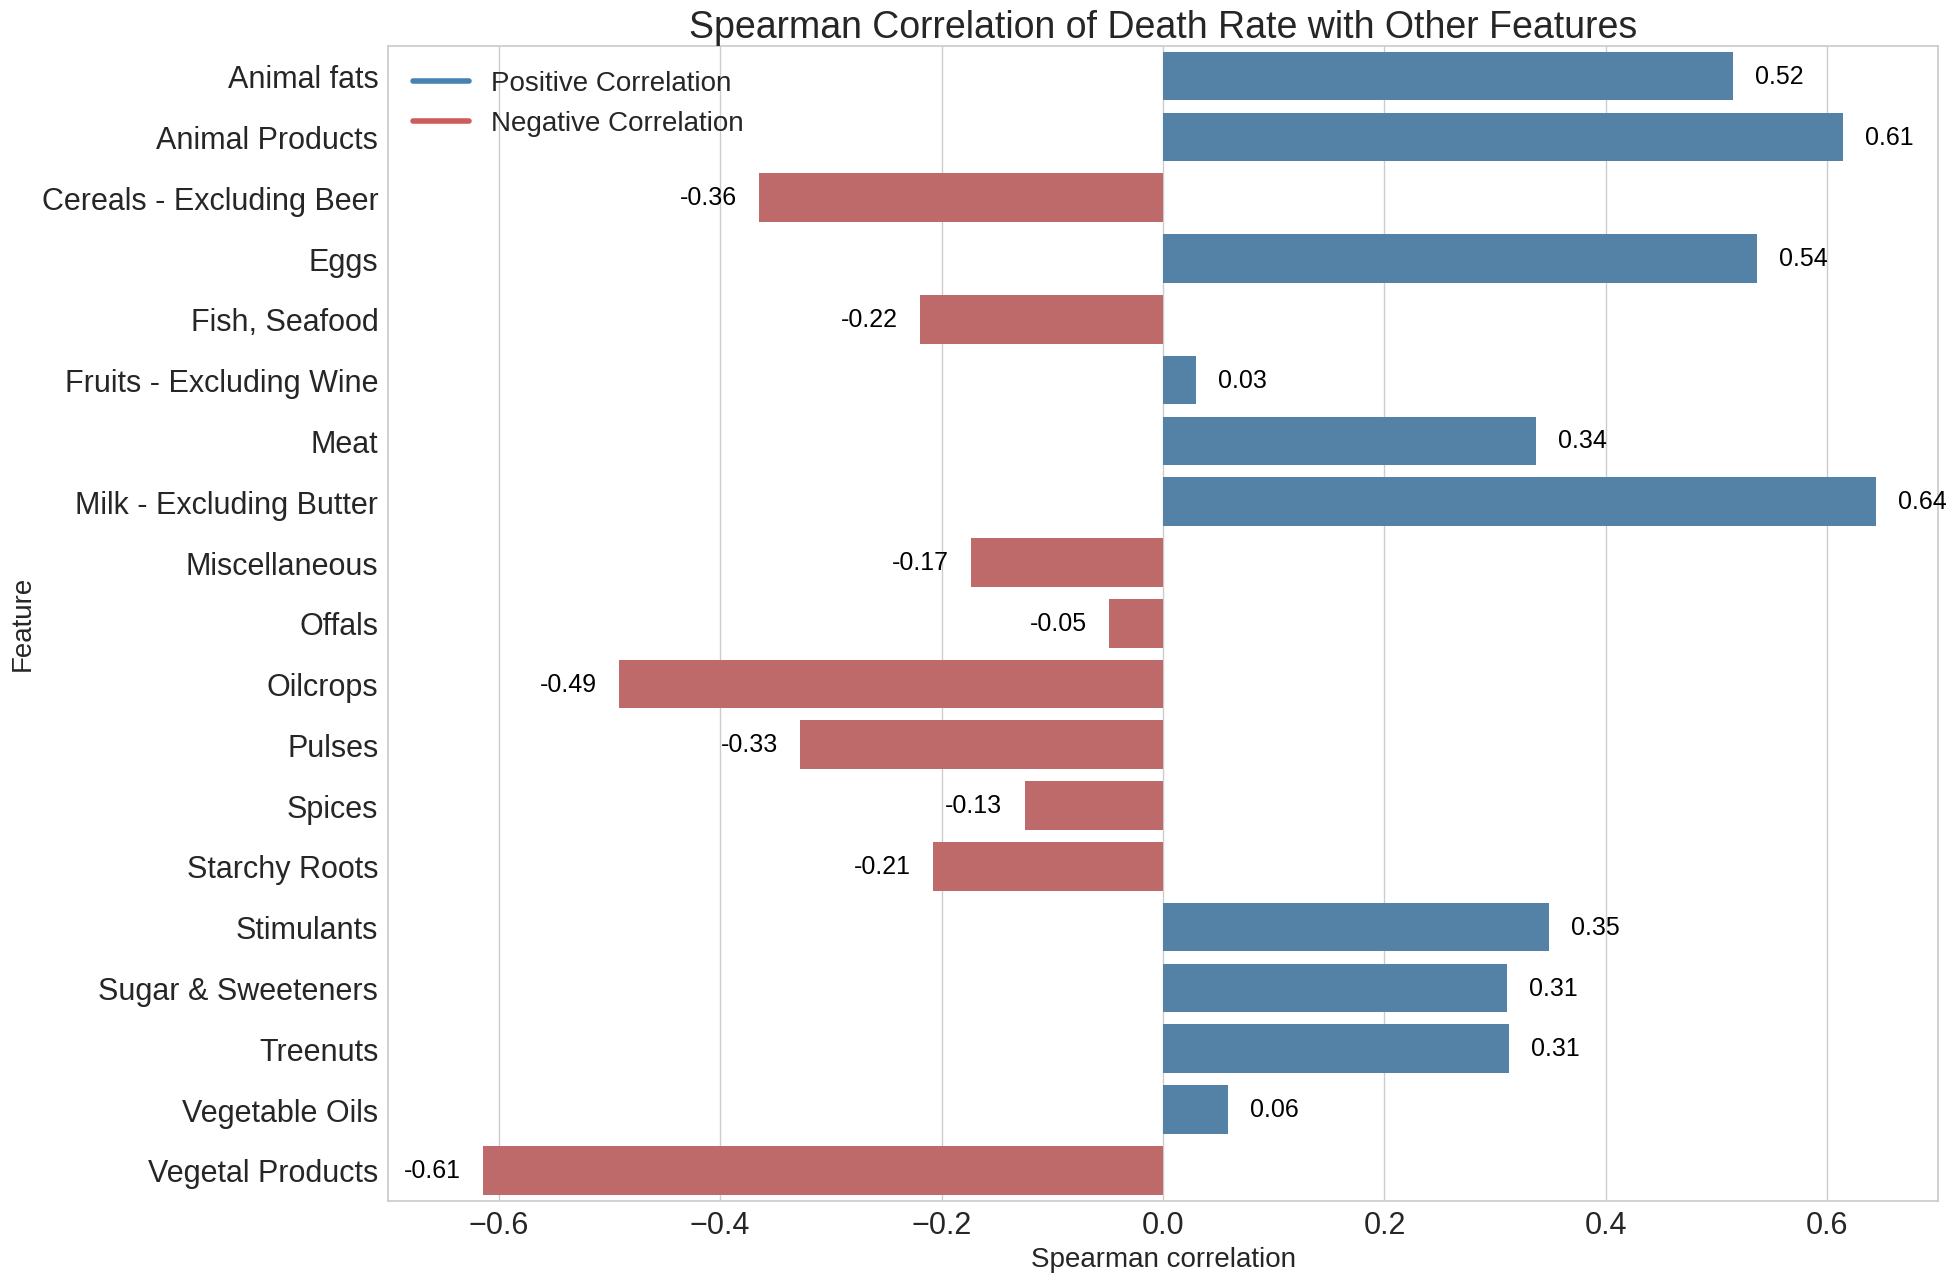

In [ ]:
# Extract correlation of Death rate with other features and drop 'Death rate' itself
death_rate_corr = corrmat['Death rate'].drop('Death rate')

# Convert the Series to a DataFrame for easier plotting
death_rate_corr_df = death_rate_corr.to_frame().reset_index()
death_rate_corr_df.columns = ['Feature', 'Correlation']

# Define the colors based on the correlation values
colors = ['steelblue' if corr > 0 else 'indianred' for corr in death_rate_corr_df['Correlation']]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(20, 15))
barplot = sns.barplot(data=death_rate_corr_df, x='Correlation', y='Feature', palette=colors, ax=ax)


plt.title('Spearman Correlation of Death Rate with Other Features', size=27)
ax.set_xlabel('Spearman correlation', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

# Setting the x axis limits
ax.set_xlim(-0.7, 0.7)

# text labels outside the bars
for index, row in death_rate_corr_df.iterrows():
    alignment = 'left' if row['Correlation'] > 0 else 'right'
    offset = 0.02 if row['Correlation'] > 0 else -0.02
    ax.text(row['Correlation'] + offset, index, round(row['Correlation'], 2), color='black', ha=alignment, va="center", fontsize=18)

# legend for colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='steelblue', lw=4, label='Positive Correlation'),
                   Line2D([0], [0], color='indianred' , lw=4, label='Negative Correlation')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=20)

plt.show()


## Data Analysis

#### Death rate Categories
- divide Death rate for Four level ['Low', 'Medium', 'High', 'Very High'] depend in Box-polt percential and Centrial limit theorm to ensure sample ( X >= 30).

In [ ]:
df = df_standardized_without_countries.copy()

# Define the thresholds based on the percentiles
thresholds = [-0.74, -0.53, 0.69, 3.14]

# Categorize data into four groups
df['Category'] = pd.cut(
    df['Death rate'],
    bins=[-float('inf'), thresholds[0], thresholds[1], thresholds[2], float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Separate the DataFrame into four groups based on the categories
df_low = df[df['Category'] == 'Low']
df_medium = df[df['Category'] == 'Medium']
df_high = df[df['Category'] == 'High']
df_very_high = df[df['Category'] == 'Very High']

# print the DataFrames:
print("Low Category:\n", df_low.shape)
print("Medium Category:\n", df_medium.shape)
print("High Category:\n", df_high.shape)
print("Very High Category:\n", df_very_high.shape)


Low Category:
 (51, 21)
Medium Category:
 (34, 21)
High Category:
 (39, 21)
Very High Category:
 (40, 21)


#### Factory Map ( Feature Importance:PCA)

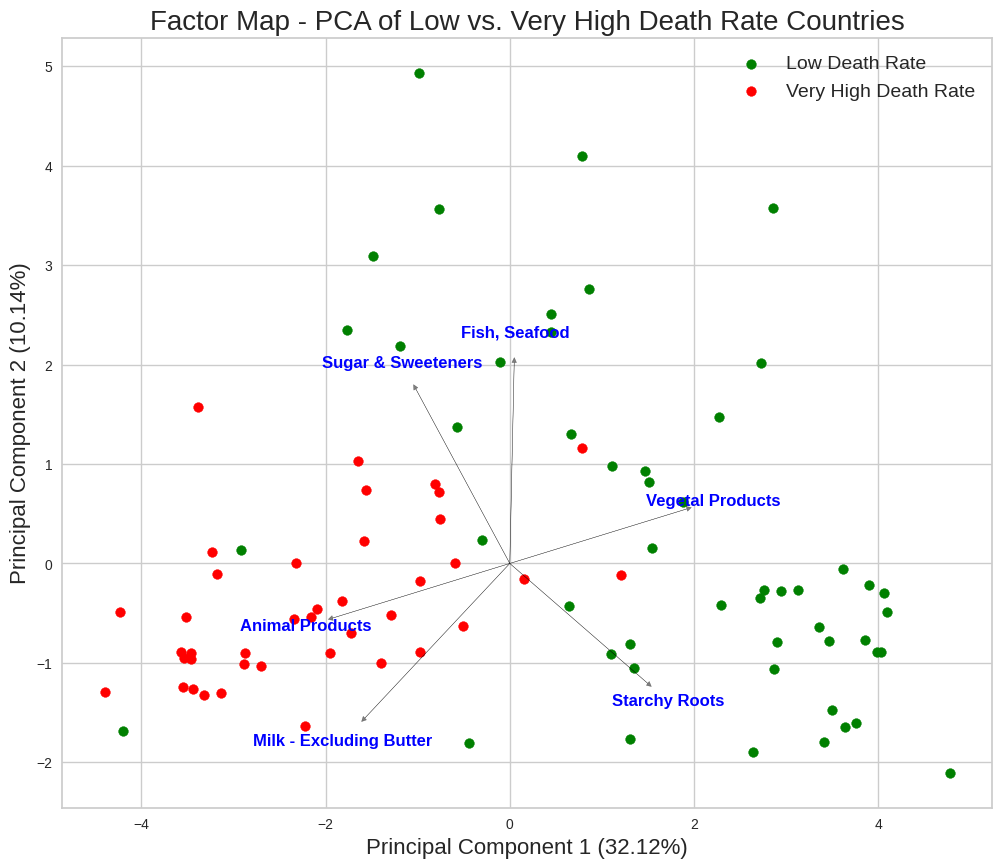

In [ ]:
# Select the independent features from df_low and df_very_high
df_low_selected = df_low[Independent_features]
df_very_high_selected = df_very_high[Independent_features]

# Combine both datasets (df_low and df_very_high)
combined_data = np.vstack((df_low_selected.values, df_very_high_selected.values))

# Perform PCA
pca = PCA(n_components=2)
combined_pca = pca.fit_transform(combined_data)

# Extracting the components
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Calculate the magnitude of the loadings for the first two components
magnitudes = np.sqrt(components[0]**2 + components[1]**2)

# Get the indices of the top 5 features with the highest magnitude
top_features_indices = np.argsort(magnitudes)[-6:]

# Factor map visualization
plt.figure(figsize=(12, 10))

# Plot the countries
plt.scatter(combined_pca[:len(df_low), 0], combined_pca[:len(df_low), 1], color='green', label='Low Death Rate')
plt.scatter(combined_pca[len(df_low):, 0], combined_pca[len(df_low):, 1], color='red', label='Very High Death Rate')

# Plot the variable vectors (arrows)
for i in top_features_indices:
    component1, component2 = components[0, i], components[1, i]
    plt.arrow(0, 0, component1 * max(combined_pca[:, 0]), component2 * max(combined_pca[:, 1]),
              color='black', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(component1 * max(combined_pca[:, 0]) * 1.15, component2 * max(combined_pca[:, 1]) * 1.15,
             df_low_selected.columns[i],
             color='blue', fontsize=12, fontweight='bold', ha='center', va='center')

# Plot settings
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}%)', fontsize=16)
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}%)', fontsize=16)
plt.title('Factor Map - PCA of Low vs. Very High Death Rate Countries', fontsize=20)
plt.legend(fontsize=14)

plt.show()


#### Countries Treemap: Death Rate by Size, Dominant Dietary Influence by Color

##### Animal Products VS Death rate

In [ ]:
# Add a small value (e.g., 1e-9) to avoid zero values
df_standardized_without_countries_with_country['Death rate'] += 1e-9
df_standardized_without_countries_with_country['Animal Products'] += 1e-9

fig = px.treemap(df_standardized_without_countries_with_country,
                 path=['Country'],  # Specify the hierarchy; in this case, only country
                 values='Death rate',  # The size of each rectangle
                 color='Animal Products',  # The color of each rectangle
                 hover_name='Country',  # Hover text to display country name
                 color_continuous_scale='RdYlGn_r',  # Inverted color scale: green for high, red for low
                 title="Countries Treemap Sized by Death Rate and Colored by Animal Products")

# text labels and remove borders between the countries
fig.update_traces(
    marker_line_width=0,
    texttemplate='%{label}<br>%{value}',  # Show country name and death rate
    textposition='middle center'
)

# layout for consistent margins, centered title, and change background color to white
fig.update_layout(
    height=550,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50),  # Set uniform margins around the chart
    plot_bgcolor='white',                 # Change plot background color to white
    paper_bgcolor='white'                 # Change paper background color to white
)

fig.show()


##### Milk - Excluding Butter VS Death rate

In [ ]:
# Add a small value (e.g., 1e-9) to avoid zero values
df_standardized_without_countries_with_country['Death rate'] += 1e-9
df_standardized_without_countries_with_country['Milk - Excluding Butter'] += 1e-9

fig = px.treemap(df_standardized_without_countries_with_country,
                 path=['Country'],  # Specify the hierarchy; in this case, only country
                 values='Death rate',  # The size of each rectangle
                 color='Milk - Excluding Butter',  # The color of each rectangle
                 hover_name='Country',  # Hover text to display country name
                 color_continuous_scale='RdYlGn_r',  # Inverted color scale: green for high, red for low
                 title="Countries Treemap Sized by Death Rate and Colored by Milk - Excluding Butter")

# text labels and remove borders between the countries
fig.update_traces(
    marker_line_width=0,
    texttemplate='%{label}<br>%{value}',  # Show country name and death rate
    textposition='middle center'
)

# layout for consistent margins, centered title, and change background color to white
fig.update_layout(
    height=550,
    title_x=0.5,
    margin=dict(l=50, r=50, t=50, b=50),  # Set uniform margins around the chart
    plot_bgcolor='white',                 # Change plot background color to white
    paper_bgcolor='white'                 # Change paper background color to white
)

fig.show()


##### Vegetal Products VS Death rate

In [ ]:
# Add a small value (e.g., 1e-9) to avoid zero values
df_standardized_without_countries_with_country['Death rate'] += 1e-9
df_standardized_without_countries_with_country['Vegetal Products'] += 1e-9

fig = px.treemap(df_standardized_without_countries_with_country,
                 path=['Country'],                 # Specify the hierarchy; in this case, only country
                 values='Death rate',              # The size of each rectangle
                 color='Vegetal Products',         # The color of each rectangle
                 hover_name='Country',                # Hover text to display country name
                 color_continuous_scale='RdYlGn_r',   # Inverted color scale: green for high, red for low
                 title="Countries Treemap Sized by Death Rate and Colored by Vegetal Products")

# show text labels and remove borders between the countries
fig.update_traces(
    marker_line_width=0,
    texttemplate='%{label}<br>%{value}',  # Show country name and death rate
    textposition='middle center'          # Position the text in the center
)

# layout for consistent margins, centered title, and change background color to white
fig.update_layout(
    height=600,
    title_x=0.5,                          # Center the title
    margin=dict(l=50, r=50, t=50, b=50),  # Set uniform margins around the chart
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Show the treemap
fig.show()


#### Non Prametric test
- Spearsman, Kendall's tau

In [ ]:
def run_non_parametric_tests(df, variable):
    spearman_corr, spearman_p = stats.spearmanr(df[variable], df['Death rate'])
    kendall_corr, kendall_p = stats.kendalltau(df[variable], df['Death rate'])

    if abs(spearman_corr) > 0.60 or abs(kendall_corr) > 0.60:
        print(f"Non-Parametric Correlation Tests for '{variable}':")
        print(f"Spearman's rho: {spearman_corr:.3f}, p-value: {spearman_p:.3e}")
        print(f"Kendall's tau : {kendall_corr:.3f}, p-value: {kendall_p:.3e}")
        print("=" * 80)

# Step 2: Statistical Tests
print("\n\nRunning Non-Parametric Correlation Tests (|corr| > 0.60):\n")
for feature in Independent_features:
    run_non_parametric_tests(df_standardized_without_countries, feature)



Running Non-Parametric Correlation Tests (|corr| > 0.60):

Non-Parametric Correlation Tests for 'Animal Products':
Spearman's rho: 0.614, p-value: 2.265e-18
Kendall's tau : 0.434, p-value: 1.770e-16
Non-Parametric Correlation Tests for 'Milk - Excluding Butter':
Spearman's rho: 0.644, p-value: 1.501e-20
Kendall's tau : 0.453, p-value: 8.115e-18
Non-Parametric Correlation Tests for 'Vegetal Products':
Spearman's rho: -0.614, p-value: 2.245e-18
Kendall's tau : -0.434, p-value: 1.770e-16
